# Data Analysis for Cab Investment

## Hypothesis and areas to investigate:
- Which company has maximum cab users at a particular time period ?
- Does margin proportionally increase with increase in number of customers ?
- What cities where people use cab the most? In these cities which cab company is most demanded ?
- In holidays which company is the most demanded ?

## Business problem
Go to market strategy, investigte two cab companies activities before investment.

## Data used:
- __Cab_Data.csv__: Details of transaction for 2 cab companies.
- __Customer_ID.csv__: Mapping table that contains a unique identifier which links the customer’s demographic details.
- __Transaction_ID.csv__: Mapping table that contains transaction to customer mapping and payment mode.
- __City.csv__: contains list of US cities, their population and number of cab users.
- __US Bank holidays.csv__: Contain all holidays.

---

#### Data read and clean

In [2]:
%run Read_and_Clean.ipynb

---
#### Cab Data 

In [3]:
#Investigate cab_data dataset
df_cab.head(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776
5,10000016,2016-01-07,Pink Cab,ATLANTA GA,6.06,72.43,63.024
6,10000017,2016-01-03,Pink Cab,AUSTIN TX,44.00,576.15,475.200
7,10000018,2016-01-07,Pink Cab,AUSTIN TX,35.65,466.10,377.890
8,10000019,2016-01-12,Pink Cab,BOSTON MA,14.40,191.61,146.880
9,10000020,2016-01-06,Pink Cab,BOSTON MA,10.89,156.98,113.256


In [4]:
# Add Income Colums
df_cab['Ride Income'] = df_cab['Price Charged'] - df_cab['Cost of Trip']
df_cab.head(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Ride Income
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844
5,10000016,2016-01-07,Pink Cab,ATLANTA GA,6.06,72.43,63.024,9.406
6,10000017,2016-01-03,Pink Cab,AUSTIN TX,44.00,576.15,475.200,100.950
7,10000018,2016-01-07,Pink Cab,AUSTIN TX,35.65,466.10,377.890,88.210
8,10000019,2016-01-12,Pink Cab,BOSTON MA,14.40,191.61,146.880,44.730
9,10000020,2016-01-06,Pink Cab,BOSTON MA,10.89,156.98,113.256,43.724


In [5]:
df_cab.shape

(359392, 8)

In [6]:
df_cab.drop(['Transaction ID'], axis=1).describe()

,KM Travelled,Price Charged,Cost of Trip,Ride Income
count,359392.000000,359392.000000,359392.000000,359392.000000
mean,22.567254,423.443311,286.190113,137.253198
std,12.233526,274.378911,157.993661,160.311840
min,1.900000,15.600000,19.000000,-220.060000
25%,12.000000,206.437500,151.200000,28.012000
50%,22.440000,386.360000,282.480000,81.962000
75%,32.960000,583.660000,413.683200,190.030000
max,48.000000,2048.030000,691.200000,1463.966000


In [7]:
df_cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
 7   Ride Income     359392 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 21.9+ MB


In [8]:
df_cab.nunique()

Transaction ID    359392
Date of Travel      1095
Company                2
City                  19
KM Travelled         874
Price Charged      99176
Cost of Trip       16291
Ride Income       301825
dtype: int64

In [9]:
df_cab['Company'].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [10]:
df_cab['City'].unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

---
#### Cab Rides

Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64

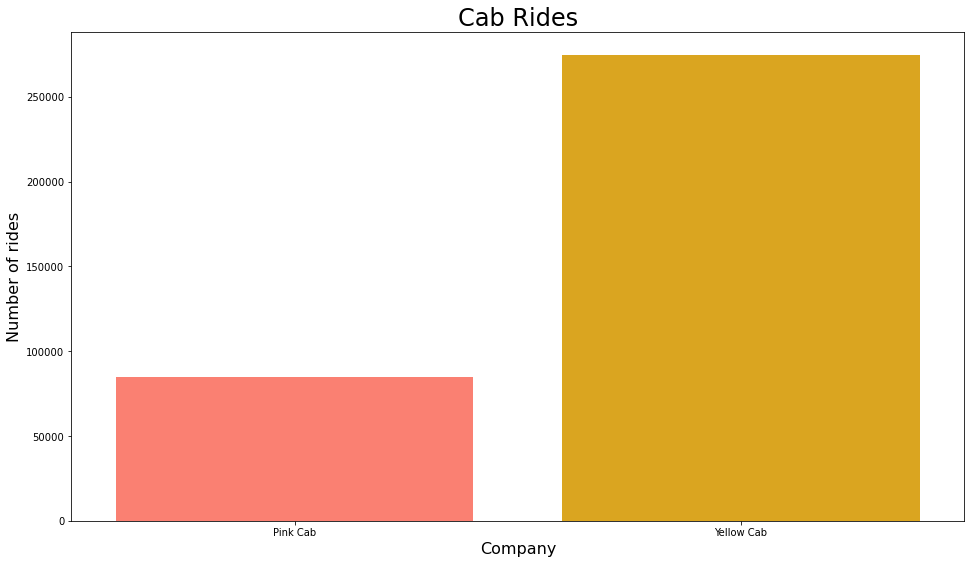

In [11]:
# Number of pink cab rides to yellow cab rides visualized.
plt.figure(figsize=(16, 9))
ax = sns.countplot(data=df_cab, x='Company')
ax.patches[0].set_facecolor('salmon')
ax.patches[1].set_facecolor('goldenrod')
plt.title("Cab Rides", fontsize=24);
plt.xlabel("Company", fontsize=16)
plt.ylabel("Number of rides", fontsize=16);
df_cab['Company'].value_counts()

---
#### Total Revenue

In [11]:
# Sum grouped by cab company
df_cab_grouped = df_cab[['KM Travelled', 'Price Charged', 'Cost of Trip', 'Ride Income',  'Company']].groupby('Company').sum()
df_cab_grouped

,KM Travelled,Price Charged,Cost of Trip,Ride Income
Company,,,,
Pink Cab,1911073.11,2.632825e+07,2.102092e+07,5.307328e+06
Yellow Cab,6199417.47,1.258539e+08,8.183351e+07,4.402037e+07


#### Revenue

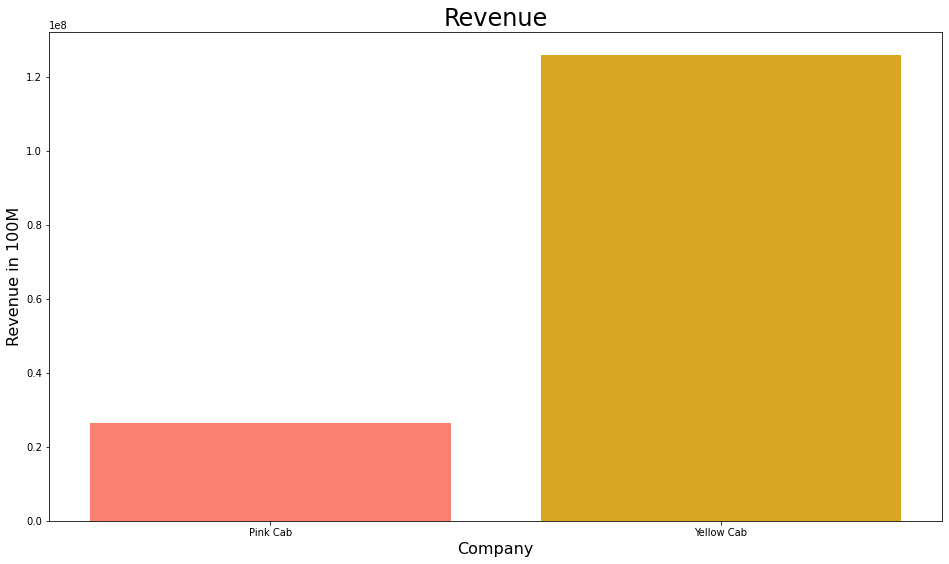

In [12]:
# difference in revenue visualized
plt.figure(figsize=(16, 9))
plt.bar(data=df_cab_grouped.reset_index(), x='Company', height='Price Charged', color=['salmon', 'goldenrod'])
plt.xticks(rotation = 90)
plt.title("Revenue", fontsize=24)
plt.xlabel("Company", fontsize=16)
plt.ylabel("Revenue in 100M", fontsize=16)
plt.xticks(rotation=0)
plt.show();

#### Income

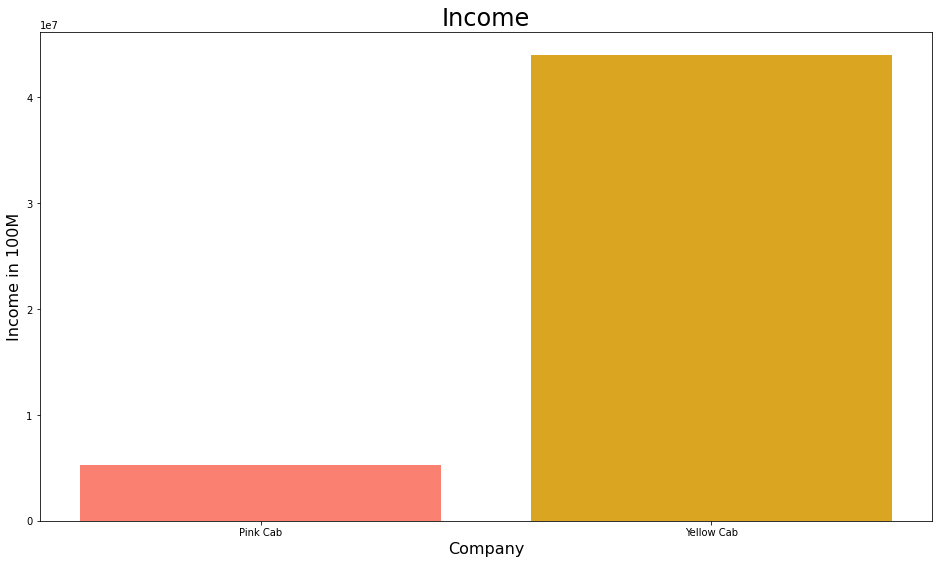

In [13]:
# difference in Income visualized
plt.figure(figsize=(16, 9))
plt.bar(data=df_cab_grouped.reset_index(), x='Company', height='Ride Income', color=['salmon', 'goldenrod'])
plt.xticks(rotation = 90)
plt.title("Income", fontsize=24)
plt.xlabel("Company", fontsize=16)
plt.ylabel("Income in 100M", fontsize=16)
plt.xticks(rotation=0)
plt.show();

---
#### Yearly Comparison

In [13]:
df_cab_yearly_grouped_sum = df_cab.groupby(['Company', df_cab['Date of Travel'].dt.year]).sum().drop('Transaction ID', axis=1)
df_cab_yearly_grouped_avg = df_cab.groupby(['Company', df_cab['Date of Travel'].dt.year]).mean().drop(['Transaction ID'], axis=1)
df_cab_yearly_grouped_sum

KM Travelled  Price Charged  Cost of Trip  \
Company    Date of Travel                                              
Pink Cab   2016               563509.67   7.908479e+06  6.194968e+06   
           2017               685823.52   9.578630e+06  7.544975e+06   
           2018               661739.92   8.841143e+06  7.280980e+06   
Yellow Cab 2016              1859978.21   3.848113e+07  2.455414e+07   
           2017              2214879.02   4.581891e+07  2.924293e+07   
           2018              2124560.24   4.155384e+07  2.803644e+07   

                            Ride Income  
Company    Date of Travel                
Pink Cab   2016            1.713511e+06  
           2017            2.033655e+06  
           2018            1.560162e+06  
Yellow Cab 2016            1.392700e+07  
           2017            1.657598e+07  
           2018            1.351740e+07

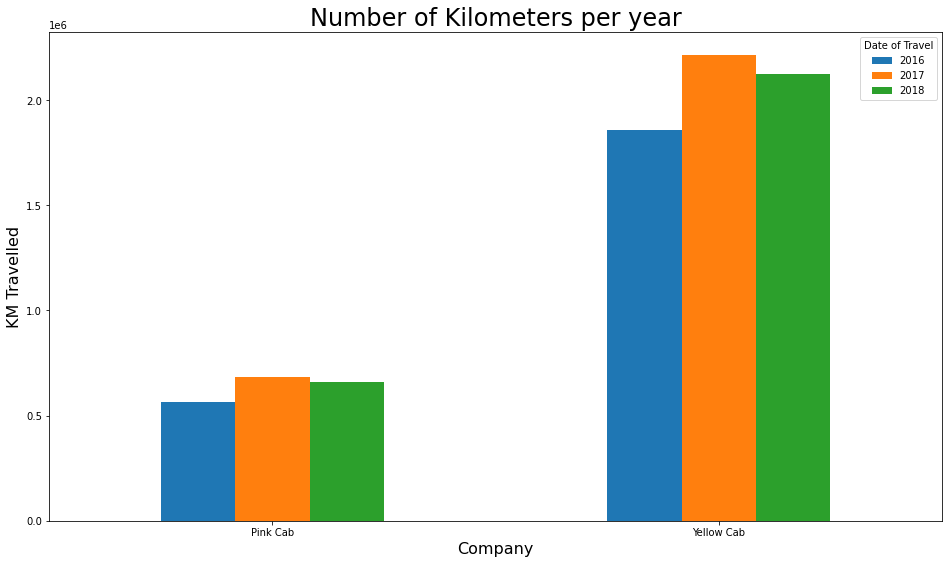

In [15]:
# Plot Kilometers travelled yearly comparison between yellow company and pink company
df_cab_yearly_grouped_sum['KM Travelled'].unstack().plot(kind='bar');
plt.title("Number of Kilometers per year", fontsize=24)
plt.ylabel("KM Travelled", fontsize=16)
plt.xlabel('Company', fontsize=16)
plt.xticks(rotation=0)
plt.gcf().set_size_inches(16, 9)

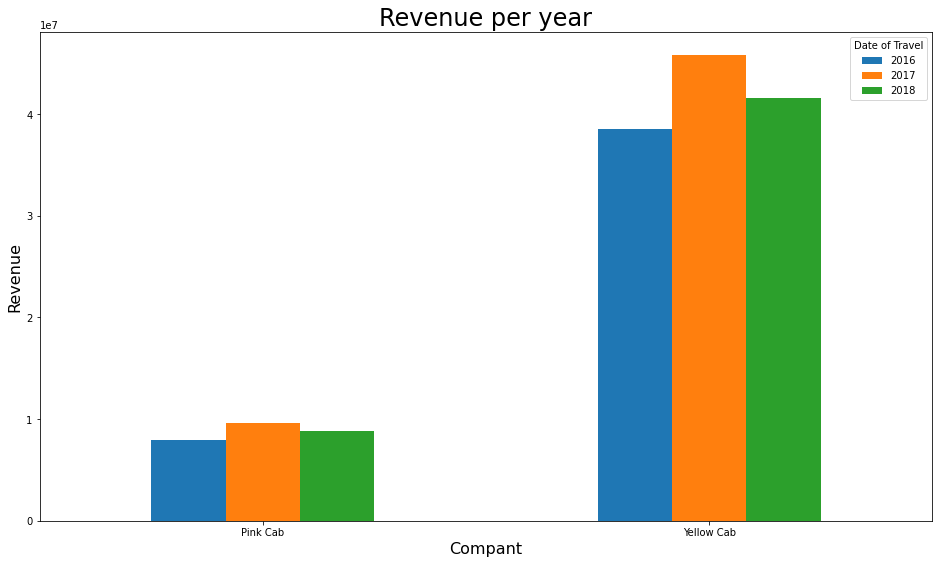

In [16]:
# Plot Revenue yearly comparison between yellow company and pink company
df_cab_yearly_grouped_sum['Price Charged'].unstack().plot(kind='bar');
plt.title("Revenue per year", fontsize=24)
plt.ylabel("Revenue", fontsize=16)
plt.xlabel('Compant', fontsize=16)
plt.xticks(rotation=0)
plt.gcf().set_size_inches(16, 9)

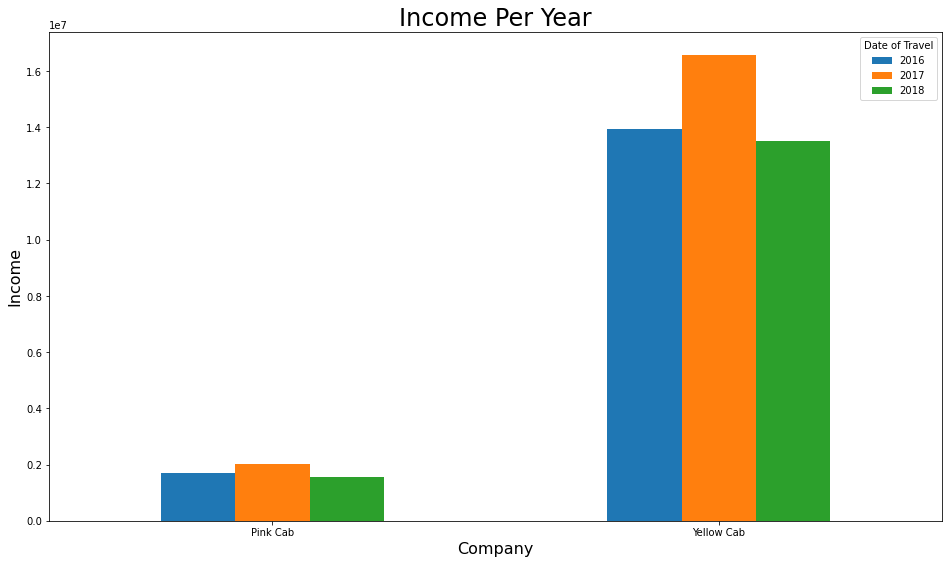

In [17]:
# Plot Revenue yearly comparison between yellow company and pink company
df_cab_yearly_grouped_sum['Ride Income'].unstack().plot(kind='bar');
plt.title("Income Per Year", fontsize=24)
plt.ylabel("Income", fontsize=16)
plt.xlabel('Company', fontsize=16)
plt.xticks(rotation=0)
plt.gcf().set_size_inches(16, 9)

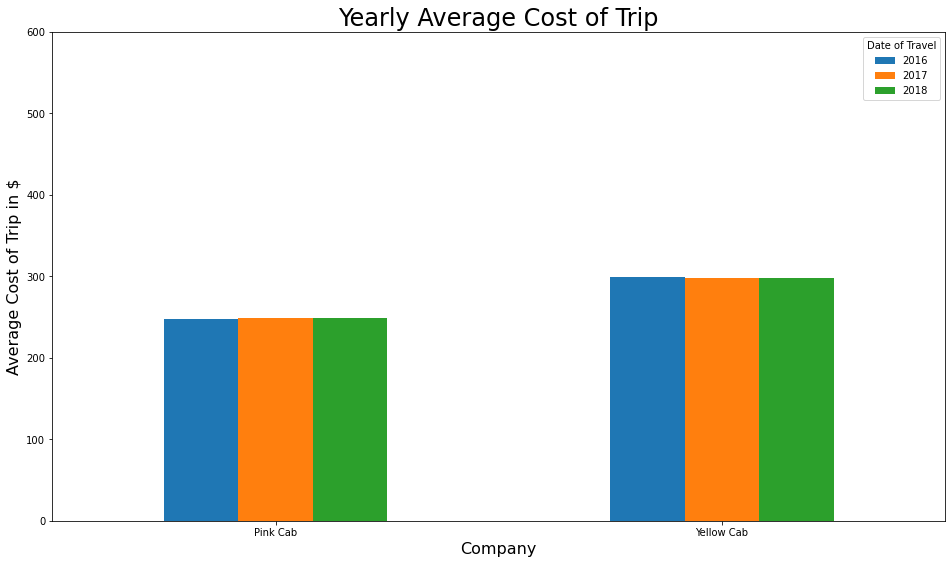

In [18]:
# Average cost of trip in 2016, 2017 and 2018
df_cab_yearly_grouped_avg['Cost of Trip'].unstack().plot(kind='bar');
plt.title('Yearly Average Cost of Trip', fontsize=24)
plt.ylabel('Average Cost of Trip in $', fontsize=16)
plt.xlabel('Company', fontsize=16)
plt.gcf().set_size_inches(16, 9)
plt.xticks(rotation=0)
plt.ylim(0, 600);

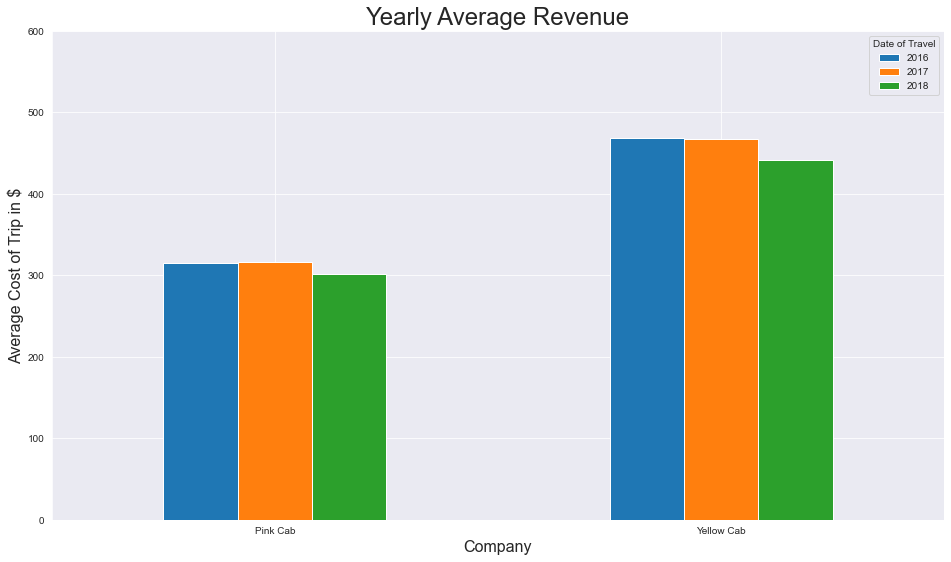

In [15]:
# Average Price Charged per trip in 2016, 2017 and 2018
df_cab_yearly_grouped_avg['Price Charged'].unstack().plot(kind='bar');
plt.title('Yearly Average Revenue', fontsize=24)
plt.ylabel('Average Cost of Trip in $', fontsize=16);
plt.xlabel('Company', fontsize=16)
plt.gcf().set_size_inches(16, 9)
plt.xticks(rotation=0)
plt.ylim(0, 600);

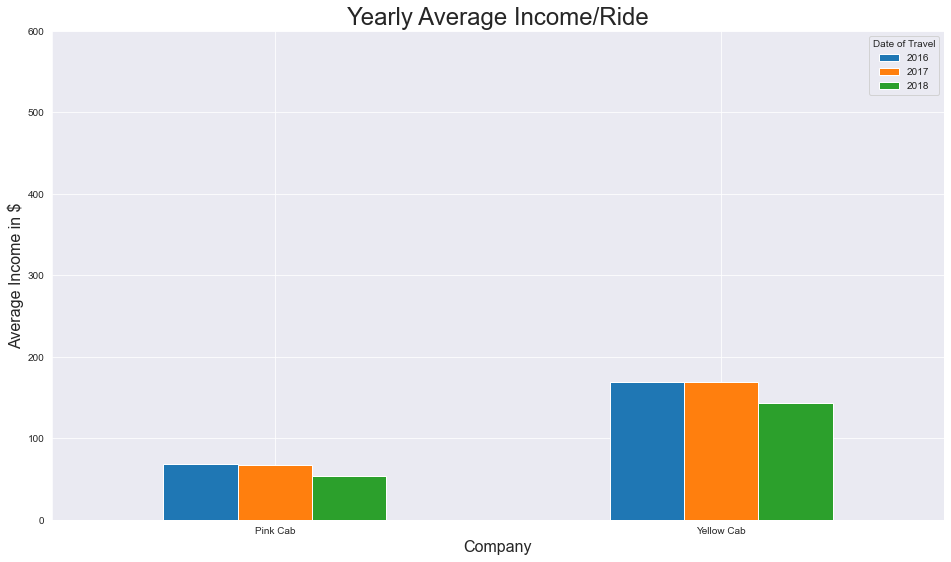

In [16]:
# Average Income per trip in 2016, 2017 and 2018
df_cab_yearly_grouped_avg['Ride Income'].unstack().plot(kind='bar');
plt.title('Yearly Average Income/Ride', fontsize=24)
plt.ylabel('Average Income in $', fontsize=16);
plt.xlabel('Company', fontsize=16)
plt.gcf().set_size_inches(16, 9)
plt.xticks(rotation=0)
plt.ylim(0, 600);

---
#### Monthly Comparison

In [17]:
# Group by two companies and see each month's sum.
df_cab_monthly_grouped_sum = df_cab.groupby(['Company', df_cab['Date of Travel'].dt.month]).sum().drop(['Transaction ID'], axis=1)
df_cab_monthly_grouped_sum

KM Travelled  Price Charged  Cost of Trip  \
Company    Date of Travel                                              
Pink Cab   1                  113740.49     1638294.62  1.250240e+06   
           2                   76210.83     1089685.63  8.376443e+05   
           3                   97080.92     1367533.76  1.068437e+06   
           4                   91880.15     1257084.99  1.011267e+06   
           5                  111492.84     1393308.68  1.224695e+06   
           6                  133577.95     1703511.10  1.470796e+06   
           7                  148305.55     1932649.58  1.630764e+06   
           8                  174195.47     2304272.60  1.916021e+06   
           9                  217291.43     2883611.63  2.389176e+06   
           10                 237926.39     3312633.47  2.616196e+06   
           11                 247898.67     3536883.37  2.726557e+06   
           12                 261472.42     3908781.90  2.879128e+06   
Yellow Cab 1                  412047.25     8797332.23  5.438896e+06   
           2                  336179.66     7412477.30  4.436499e+06   
           3                  393560.89     8346839.42  5.195625e+06   
           4                  391822.07     8248645.24  5.173102e+06   
           5                  421559.05     9546900.53  5.563357e+06   
           6                  424771.06     9185653.68  5.605315e+06   
           7                  478426.74     9178862.64  6.317301e+06   
           8                  531992.91     9881988.88  7.025718e+06   
           9                  611532.39    12213217.31  8.070835e+06   
           10                 681823.67    13249509.74  8.998998e+06   
           11                 715805.03    14056306.30  9.446985e+06   
           12                 799896.75    15736153.92  1.056088e+07   

                            Ride Income  
Company    Date of Travel                
Pink Cab   1               3.880546e+05  
           2               2.520413e+05  
           3               2.990966e+05  
           4               2.458181e+05  
           5               1.686139e+05  
           6               2.327152e+05  
           7               3.018851e+05  
           8               3.882513e+05  
           9               4.944353e+05  
           10              6.964371e+05  
           11              8.103262e+05  
           12              1.029654e+06  
Yellow Cab 1               3.358436e+06  
           2               2.975979e+06  
           3               3.151215e+06  
           4               3.075543e+06  
           5               3.983544e+06  
           6               3.580338e+06  
           7               2.861562e+06  
           8               2.856271e+06  
           9               4.142382e+06  
           10              4.250512e+06  
           11              4.609321e+06  
           12              5.175271e+06

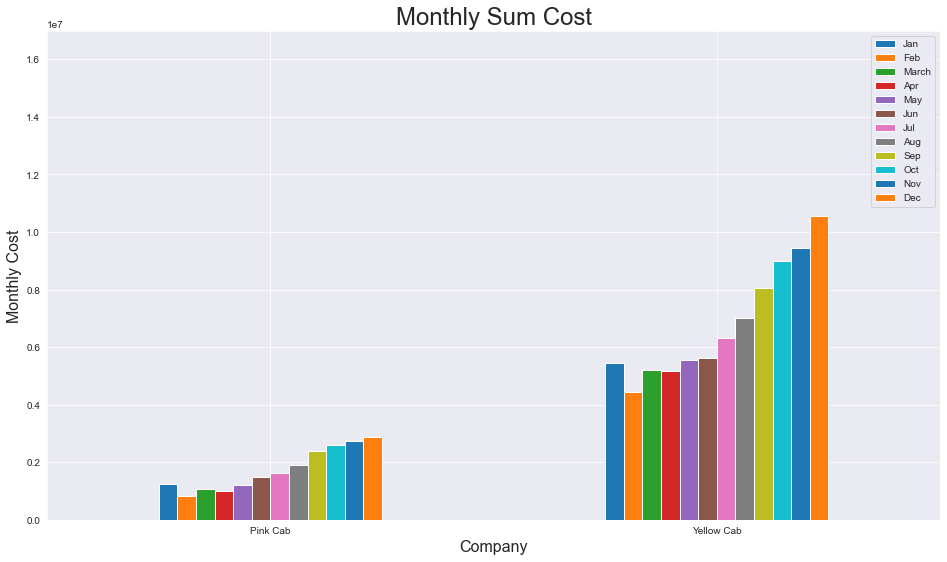

In [18]:
# Sum of trip costs of each month over three years
df_cab_monthly_grouped_sum['Cost of Trip'].unstack().plot(kind='bar')
plt.gcf().set_size_inches(16, 9)
plt.legend(['Jan', 'Feb', 'March', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']);
plt.title("Monthly Sum Cost", fontsize=24)
plt.xticks(rotation=0)
plt.ylabel("Monthly Cost", fontsize=16);
plt.xlabel("Company", fontsize=16)
plt.ylim(0, 1.7e7);

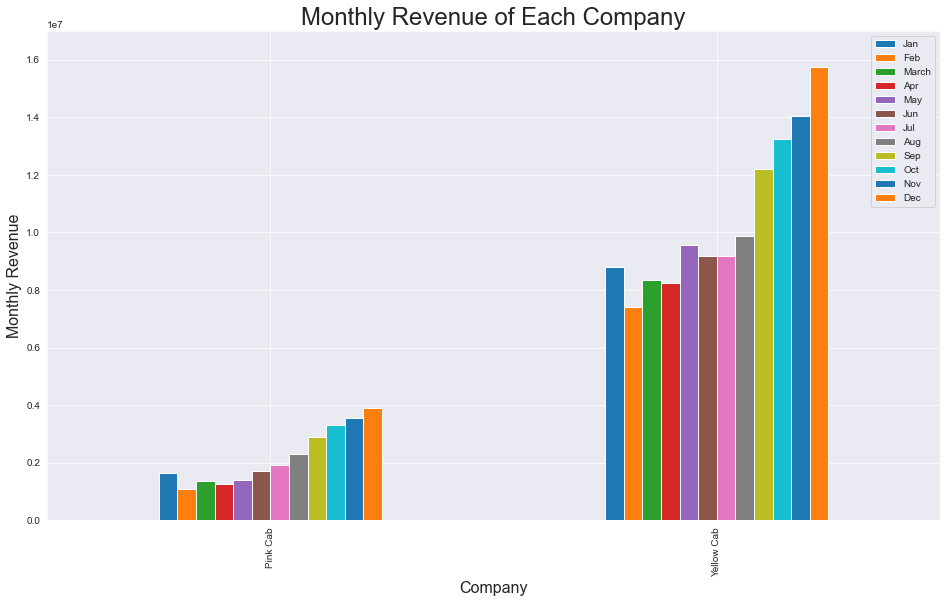

In [19]:
# Sum of price charged of each month over three years
df_cab_monthly_grouped_sum['Price Charged'].unstack().plot(kind='bar')
plt.gcf().set_size_inches(16, 9)
plt.legend(['Jan', 'Feb', 'March', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']);
plt.title("Monthly Revenue of Each Company", fontsize=24)
plt.ylabel("Monthly Revenue", fontsize=16);
plt.xlabel("Company", fontsize=16)
plt.ylim(0, 1.7e7);

---
#### q1- Which company has maximum cab users at a particular time period ?
---
#### Yealy Rides Comparison

In [20]:
df_yellow = df_cab[df_cab['Company'] == 'Yellow Cab']
df_pink = df_cab[df_cab['Company'] == 'Pink Cab']

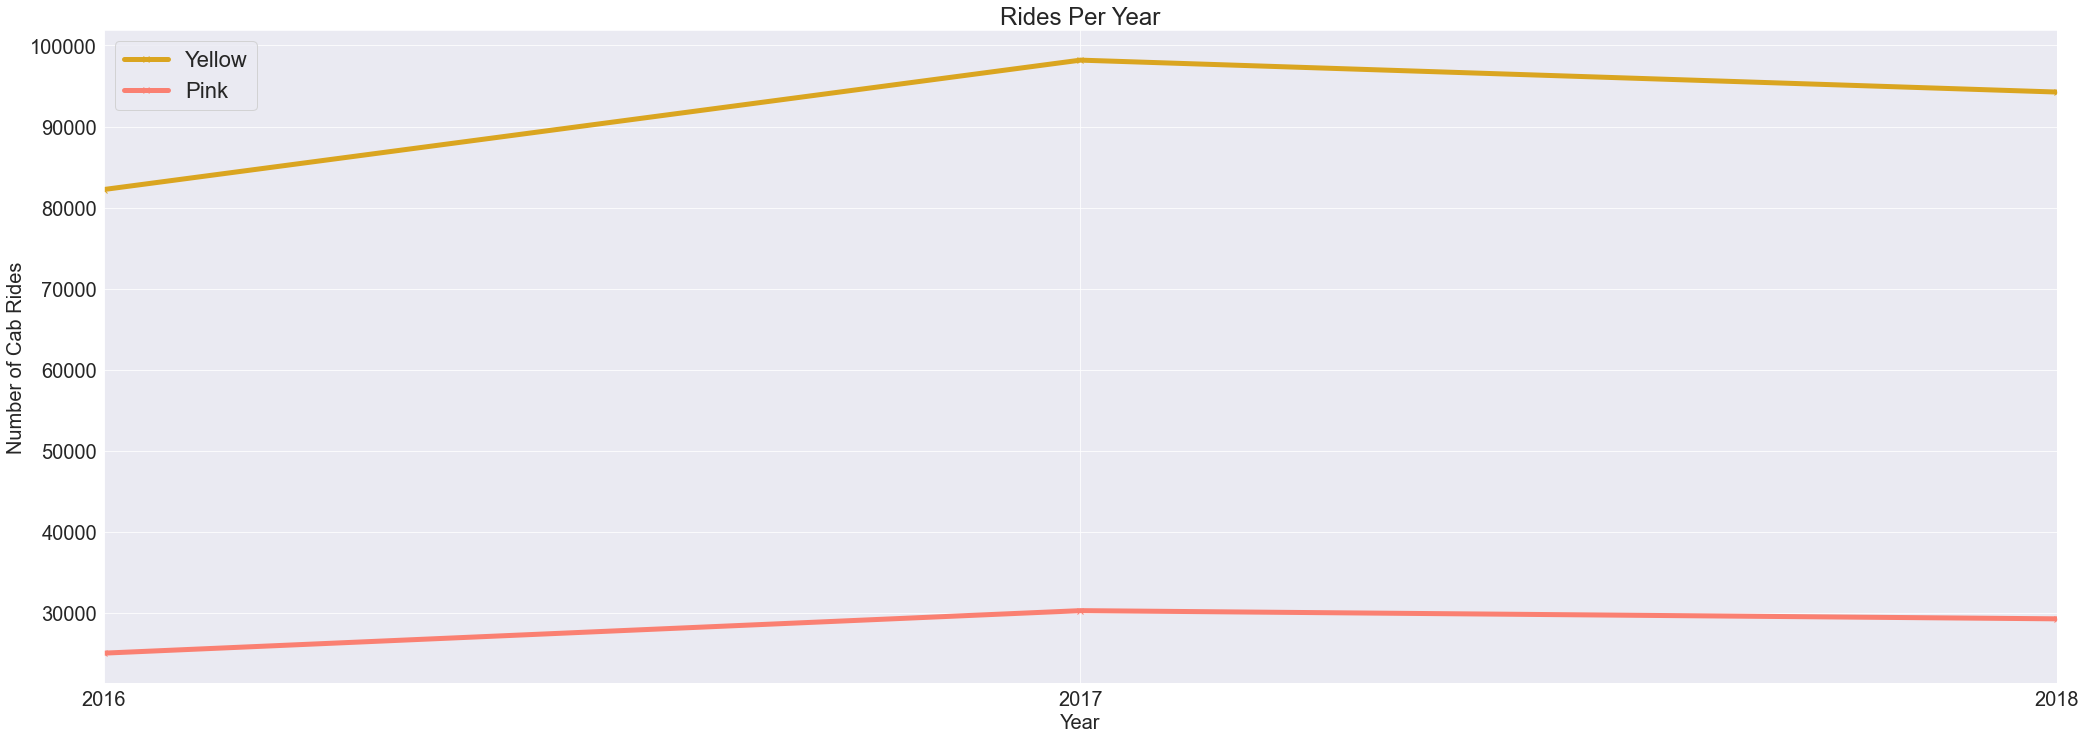

In [29]:
plt.figure(figsize=(35,12))
sns.set_style("darkgrid")
df_yellow['Date of Travel'].value_counts().resample('y').sum().plot.line(marker='x', linewidth=5, label='Yellow', color='goldenrod');
df_pink['Date of Travel'].value_counts().resample('y').sum().plot.line(marker='x', linewidth=5, label='Pink', color='salmon');
plt.legend()
plt.title("Rides Per Year", fontsize=24)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Number of Cab Rides", fontsize=20);
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=22);

#### Monthly Rides Comparison

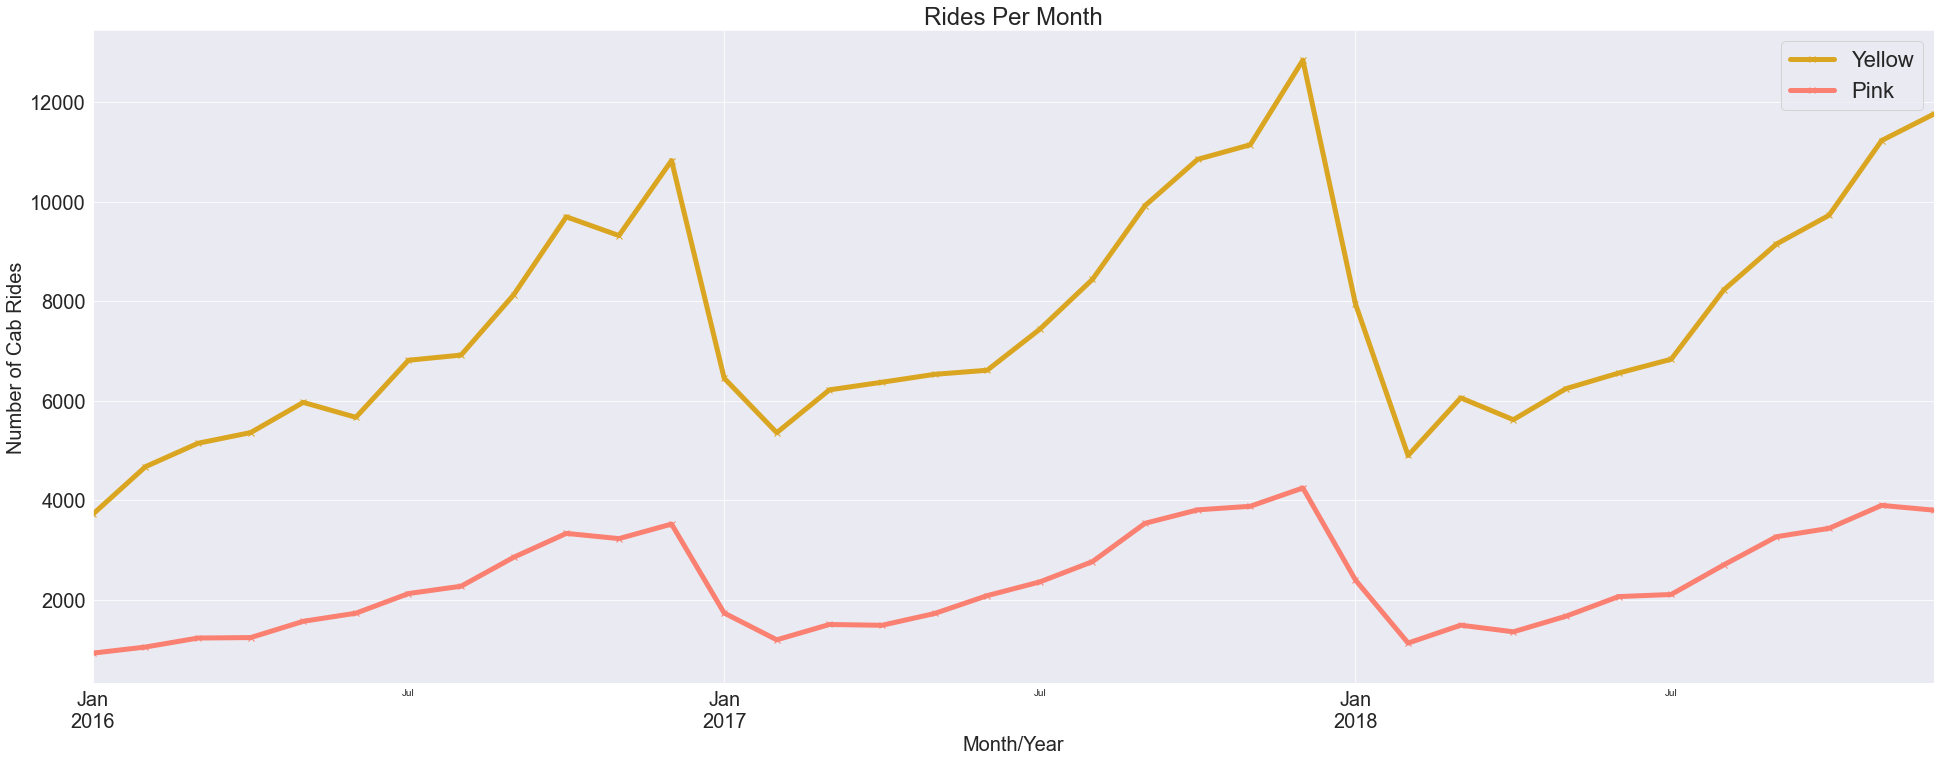

In [30]:
plt.figure(figsize=(33,12))
sns.set_style("darkgrid")
df_yellow['Date of Travel'].value_counts().resample('m').sum().plot.line(marker='x', linewidth=5, label='Yellow', color='goldenrod')
df_pink['Date of Travel'].value_counts().resample('m').sum().plot.line(marker='x', linewidth=5, label='Pink', color='salmon')
plt.legend()
plt.title("Rides Per Month", fontsize=24)
plt.xlabel("Month/Year", fontsize=20)
plt.ylabel("Number of Cab Rides", fontsize=20);
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=22);

#### ans1- Yellow Cab company has much more cab users Yearly and monthly from 2016 to 2019
---

#### q2- Does margin proportionally increase with increase in number of customers ?

---
#### Yearly Income Comparison

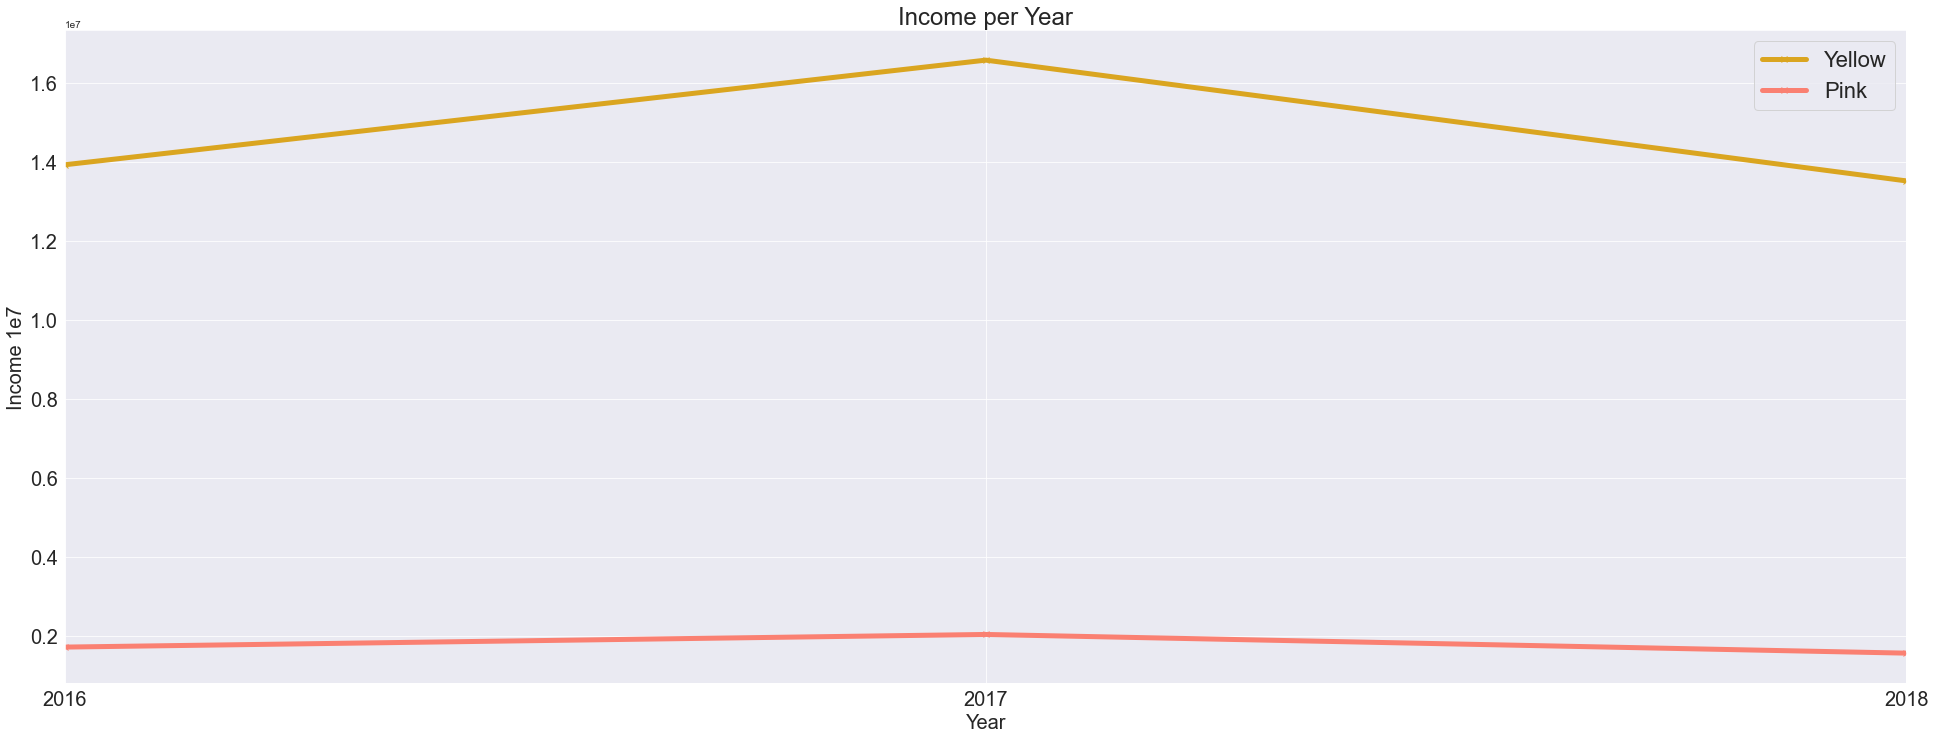

In [26]:
plt.figure(figsize=(33,12))
sns.set_style("darkgrid")
df_yellow.set_index('Date of Travel')['Ride Income'].resample('y').sum().plot.line(marker='x', linewidth=5, label='Yellow', color='goldenrod')
df_pink.set_index('Date of Travel')['Ride Income'].resample('y').sum().plot.line(marker='x', linewidth=5, label='Pink', color='salmon')
plt.legend()
plt.title("Income per Year", fontsize=24)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Income 1e7", fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(fontsize=22);

#### Monthly Income Comparison

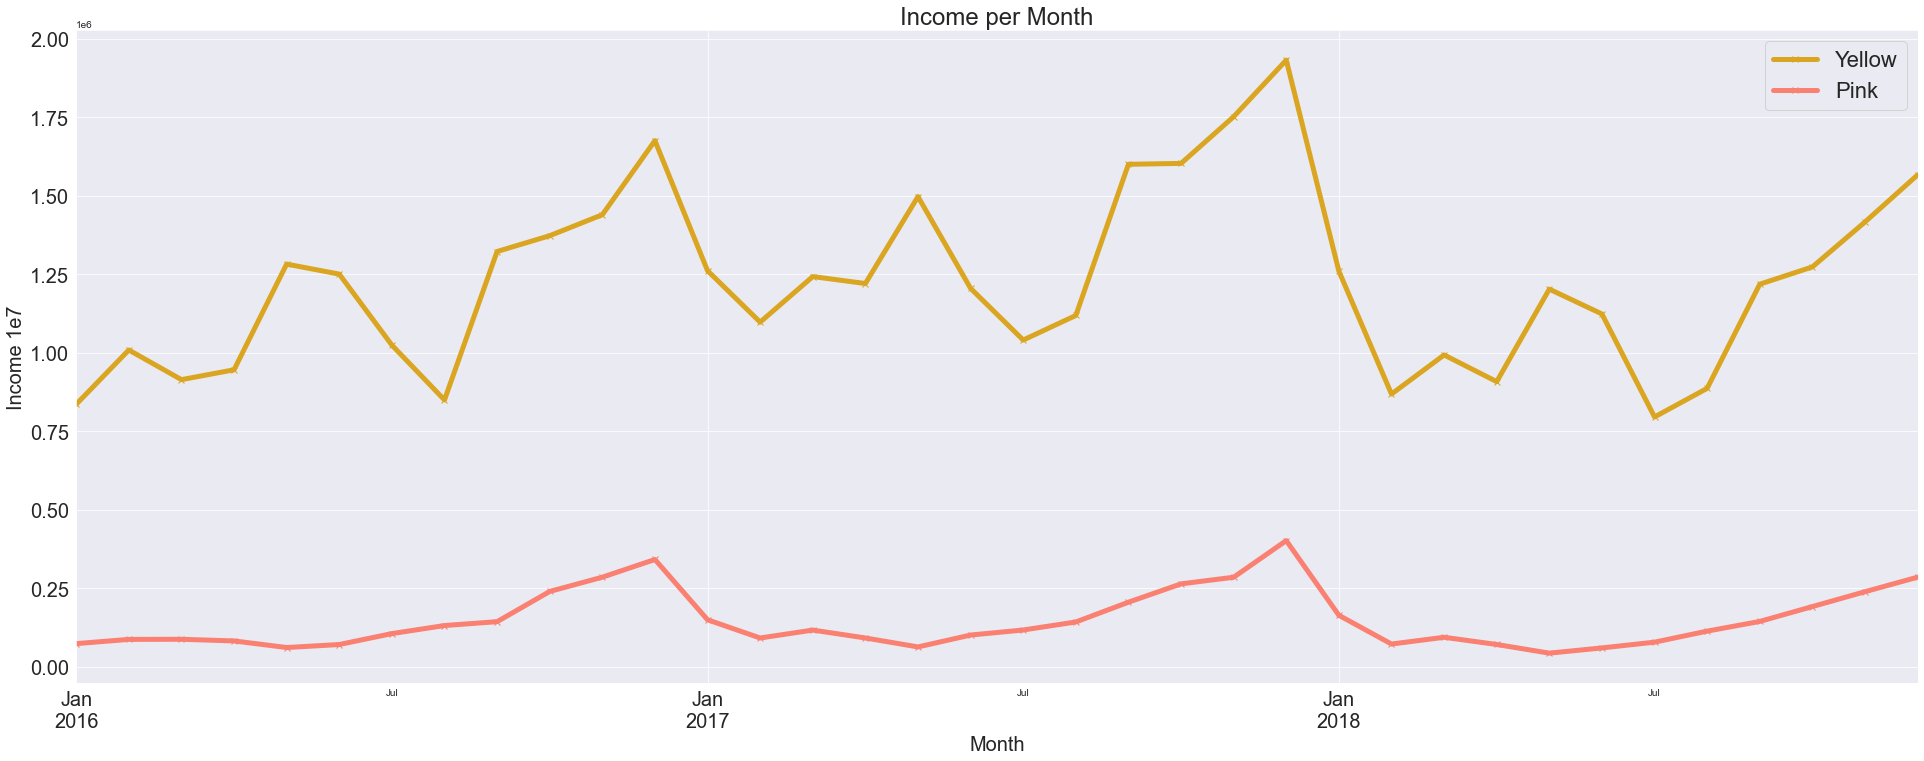

In [28]:
plt.figure(figsize=(33,12))
sns.set_style("darkgrid")
df_yellow.set_index('Date of Travel')['Ride Income'].resample('m').sum().plot.line(marker='x', linewidth=5, label='Yellow', color='goldenrod')
df_pink.set_index('Date of Travel')['Ride Income'].resample('m').sum().plot.line(marker='x', linewidth=5, label='Pink', color='salmon')
plt.legend()
plt.title("Income per Month", fontsize=24)
plt.xlabel("Month", fontsize=20)
plt.ylabel("Income 1e7", fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(fontsize=22);

#### ans2- Yes, Yellow cab company has much more income than pink cab company, since it has more customers
---

#### City Data

In [29]:
df_city.head(10)

,City,Population,Users,Perc_Users
0,NEW YORK NY,8405837,302149,3.594514
1,CHICAGO IL,1955130,164468,8.412126
2,LOS ANGELES CA,1595037,144132,9.036279
3,MIAMI FL,1339155,17675,1.319862
4,SILICON VALLEY,1177609,27247,2.313756
5,ORANGE COUNTY,1030185,12994,1.261327
6,SAN DIEGO CA,959307,69995,7.296413
7,PHOENIX AZ,943999,6133,0.649683
8,DALLAS TX,942908,22157,2.349858
9,ATLANTA GA,814885,24701,3.031225


In [30]:
df_city.shape

(20, 4)

In [31]:
df_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        20 non-null     object 
 1   Population  20 non-null     int64  
 2   Users       20 non-null     int64  
 3   Perc_Users  20 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 768.0+ bytes


In [32]:
df_city.describe()

,Population,Users,Perc_Users
count,2.000000e+01,20.000000,20.000000
mean,1.231592e+06,64520.650000,7.444031
std,1.740127e+06,83499.375289,10.930054
min,2.489680e+05,3643.000000,0.649683
25%,6.086372e+05,11633.250000,1.312556
50%,7.845590e+05,23429.000000,2.591386
75%,1.067041e+06,91766.000000,7.575341
max,8.405837e+06,302149.000000,33.928217


---
#### q3- What cities where people use cab the most? In these cities which cab company is most demanded ?

---
#### Population Distribution

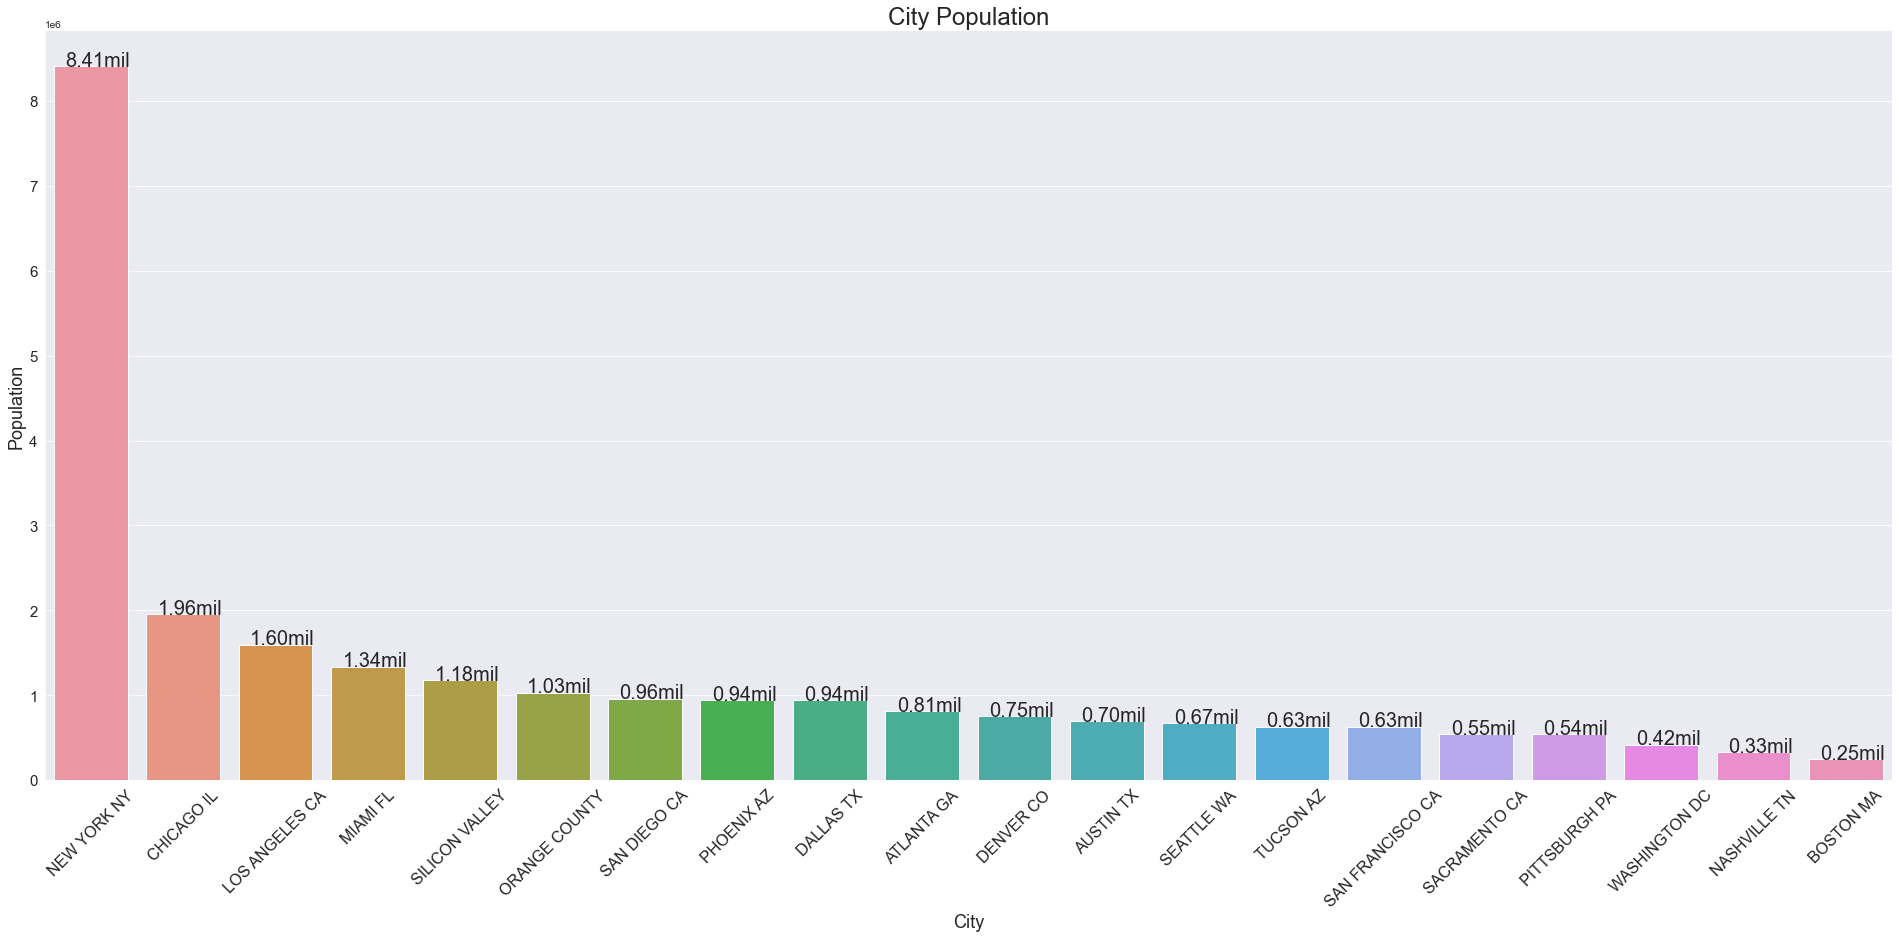

In [33]:
# Population distribution
g = sns.catplot(data=df_city, x='City', y='Population', kind='bar')
ax = g.facet_axis(0, 0)
for p in ax.patches:
    ax.text(p.get_x() + 0.125, p.get_height() + 1.5, "{:.2f}mil".format(p.get_height() / 1000000), fontsize=20)
plt.gcf().set_size_inches(32, 12)
plt.title("City Population", fontsize=24)
plt.ylabel('Population', fontsize=18)
plt.xlabel('City', fontsize=18)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=15);

---
#### Cab User Distribution

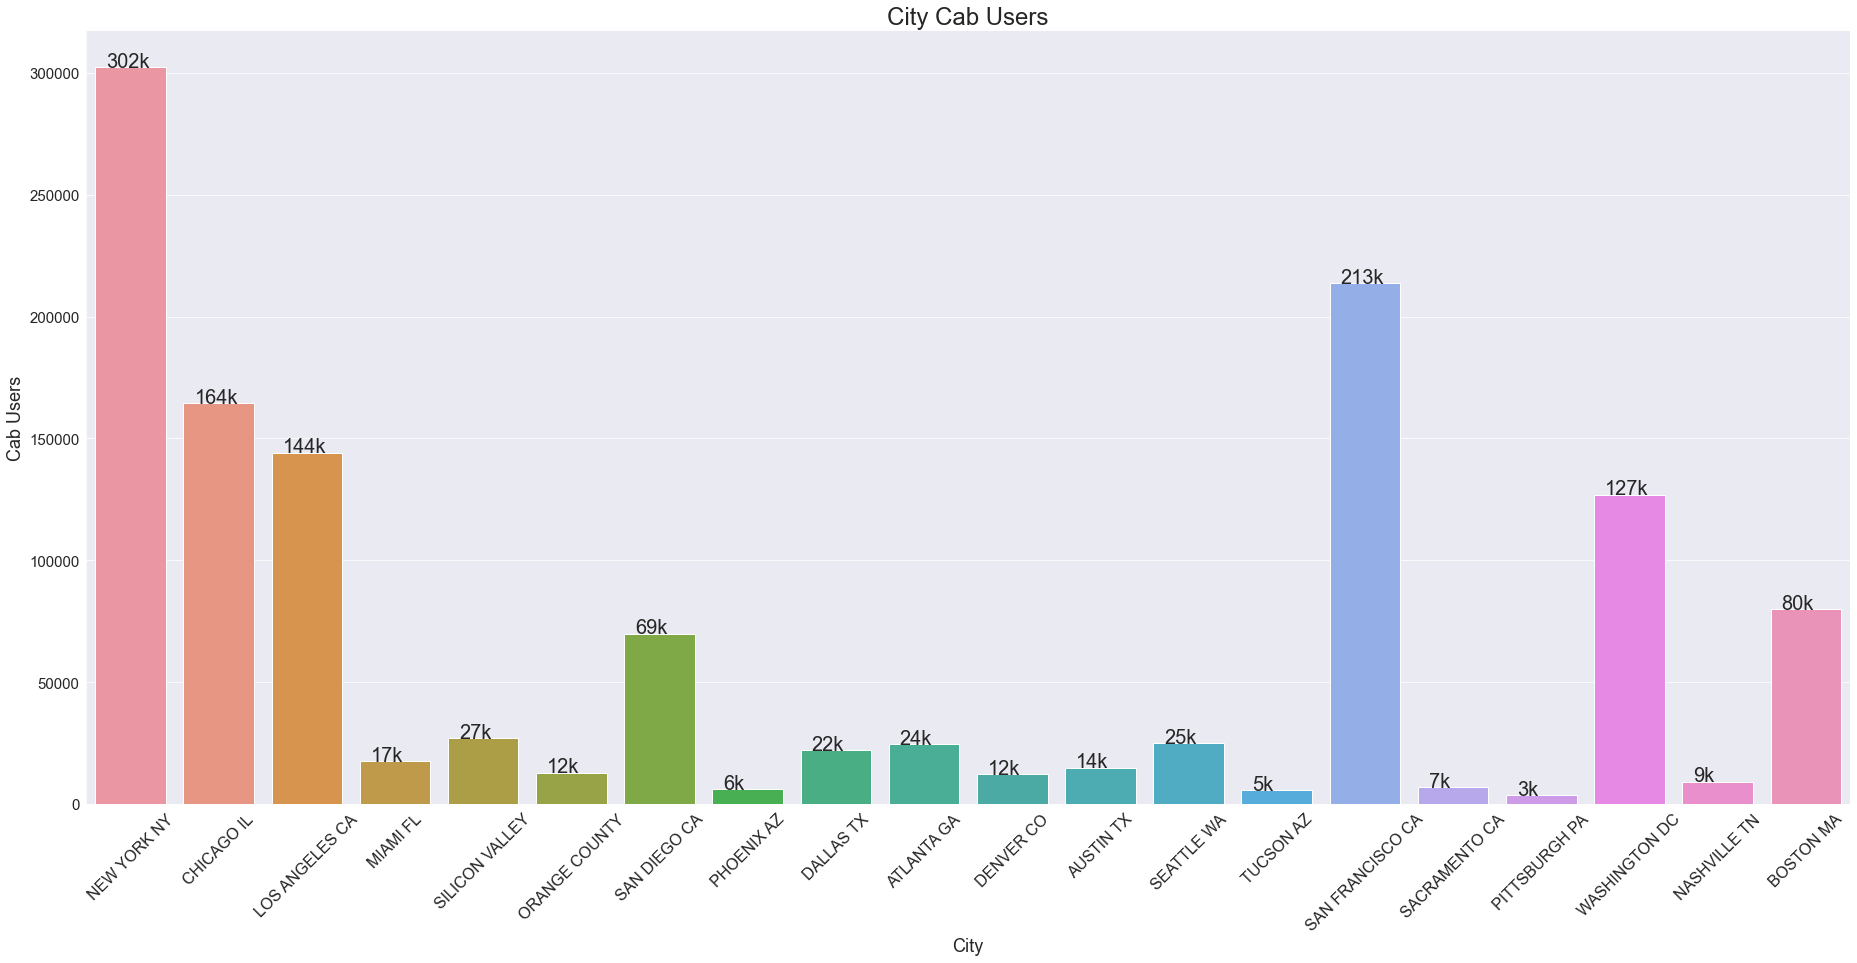

In [34]:
# Users Distribution
g = sns.catplot(data=df_city, x='City', y='Users', kind='bar')
ax = g.facet_axis(0, 0)
for p in ax.patches:
    ax.text(p.get_x() + 0.125, p.get_height() + 1.5, str(int(p.get_height()) // 1000) + 'k', fontsize=20)
plt.gcf().set_size_inches(32, 12)
plt.title("City Cab Users", fontsize=24)
plt.ylabel('Cab Users', fontsize=18)
plt.xlabel('City', fontsize=18)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=15);

---
#### Percentage Distribution

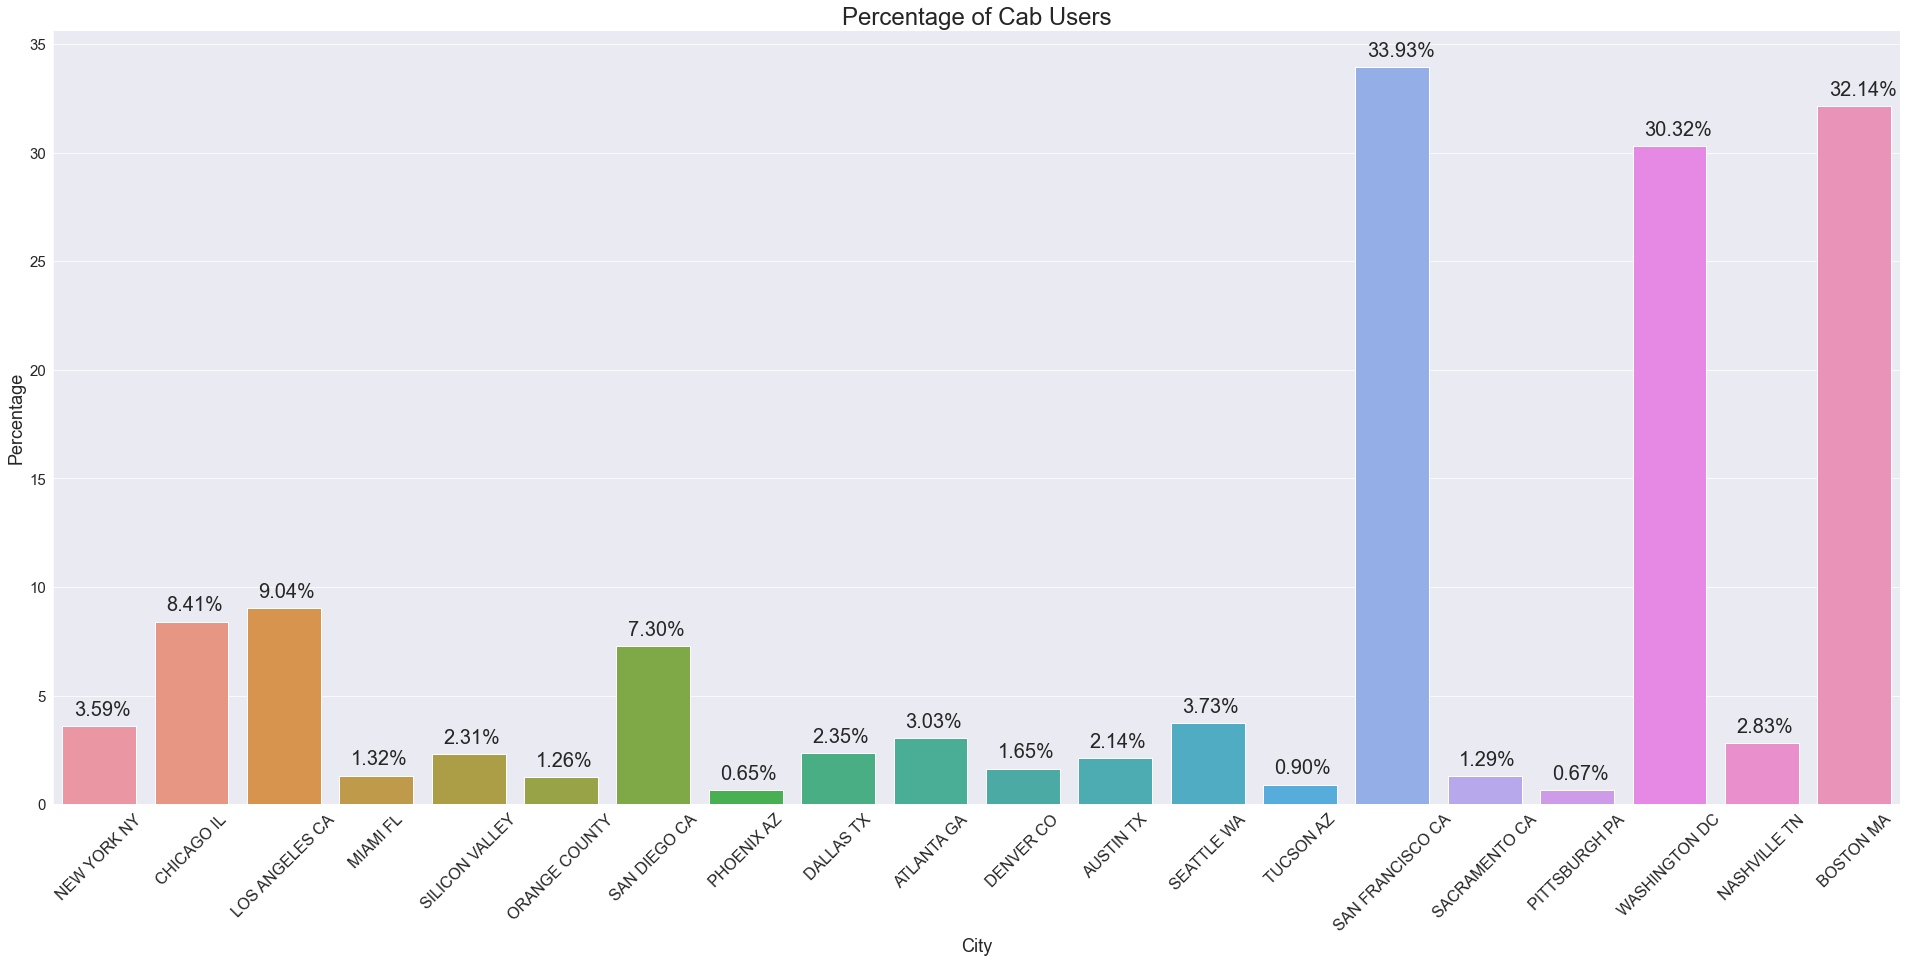

In [35]:
# Percentage of cab users per city
g = sns.catplot(data=df_city, x='City', y='Perc_Users', kind='bar')
ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.125, p.get_height() + .5, "{:.2f}%".format(p.get_height()), fontsize=20)
plt.gcf().set_size_inches(32, 12)
plt.title("Percentage of Cab Users", fontsize=24)
plt.ylabel('Percentage', fontsize=18)
plt.xlabel('City', fontsize=18)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=15);

----
#### Profit and Rides of each cab company in each city

In [36]:
# Cab and City dataframes
df_city_cab = pd.merge(df_city, df_cab, on='City', how='inner')
df_city_cab

,City,Population,Users,Perc_Users,Transaction ID,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip,Ride Income
0,NEW YORK NY,8405837,302149,3.594514,10000139,2016-01-08,Pink Cab,17.85,242.90,198.1350,44.7650
1,NEW YORK NY,8405837,302149,3.594514,10000140,2016-01-09,Pink Cab,25.30,407.21,255.5300,151.6800
2,NEW YORK NY,8405837,302149,3.594514,10000141,2016-01-06,Pink Cab,16.32,236.41,186.0480,50.3620
3,NEW YORK NY,8405837,302149,3.594514,10000142,2016-01-04,Pink Cab,12.43,194.61,144.1880,50.4220
4,NEW YORK NY,8405837,302149,3.594514,10000143,2016-01-09,Pink Cab,29.70,434.57,350.4600,84.1100
...,...,...,...,...,...,...,...,...,...,...,...
359387,BOSTON MA,248968,80021,32.141078,10437872,2018-01-04,Yellow Cab,1.96,26.23,25.1664,1.0636
359388,BOSTON MA,248968,80021,32.141078,10437873,2018-01-05,Yellow Cab,23.52,380.22,338.6880,41.5320
359389,BOSTON MA,248968,80021,32.141078,10437874,2018-01-06,Yellow Cab,29.10,393.33,391.1040,2.2260
359390,BOSTON MA,248968,80021,32.141078,10437875,2018-01-08,Yellow Cab,3.33,42.31,46.7532,-4.4432


---
#### Yellow/Pink KM Travelled per city

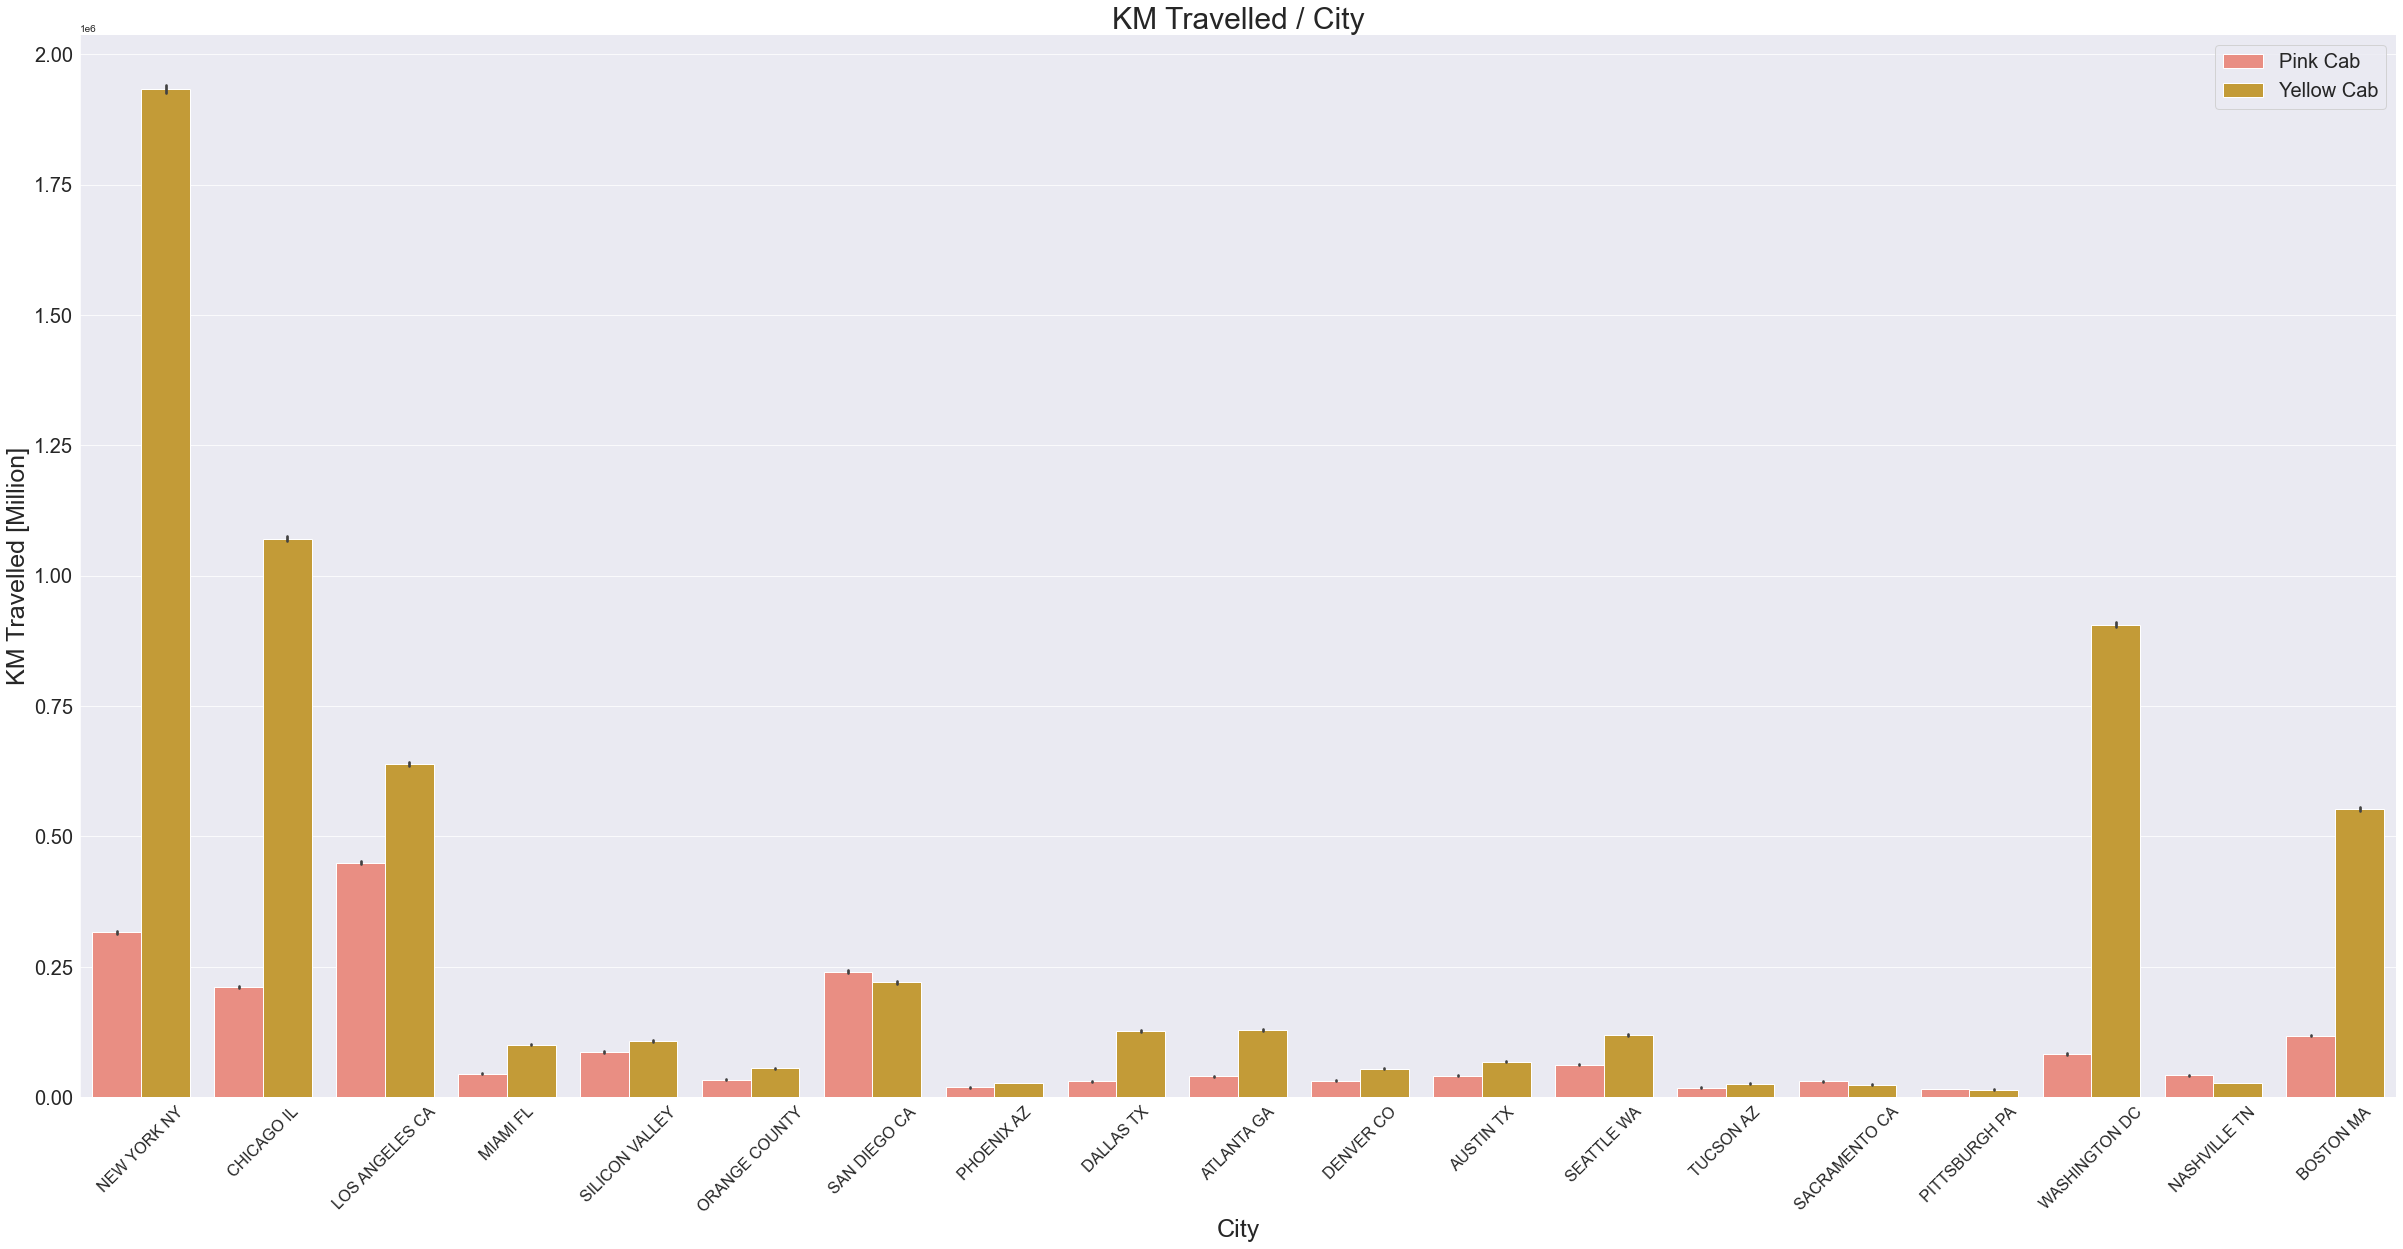

In [41]:
sns.catplot(data=df_city_cab, x='City', y='KM Travelled', hue='Company', kind='bar', estimator=sum, legend_out=False, palette=sns.color_palette(['salmon', 'goldenrod']))
plt.gcf().set_size_inches(40, 17)
plt.title("KM Travelled / City", fontsize=30)
plt.xlabel('City', fontsize=25)
plt.ylabel('KM Travelled [Million]', fontsize=25)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=20);
plt.legend(prop={'size': 20});

#### Yellow/Pink Income  per city

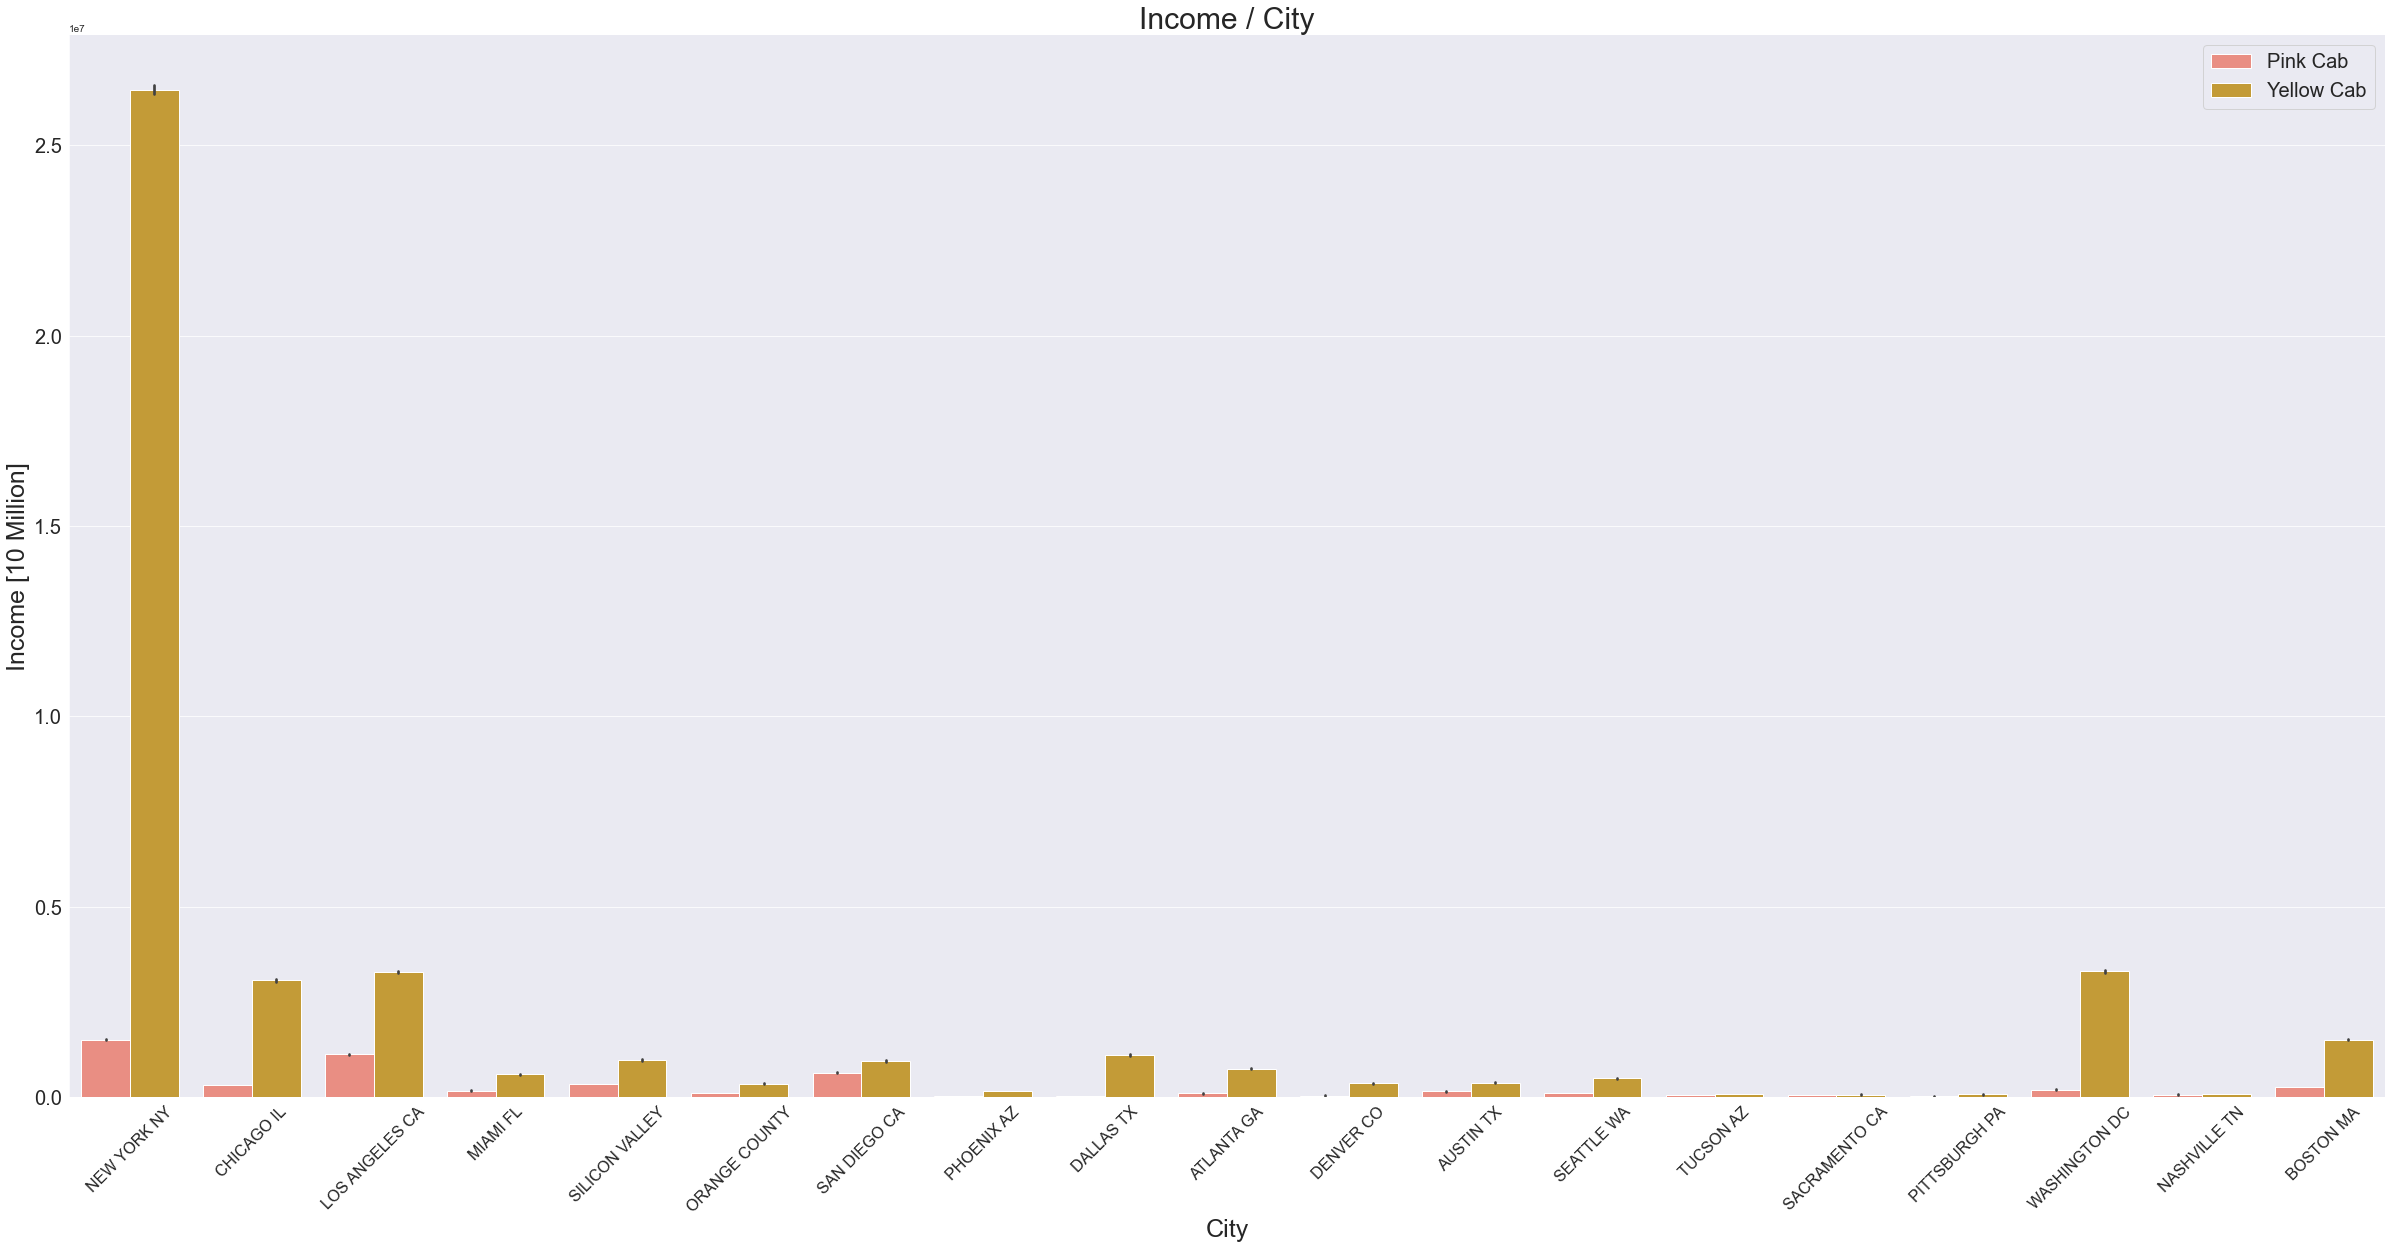

In [42]:
sns.catplot(data=df_city_cab, x='City', y='Ride Income', hue='Company', kind='bar', estimator=sum, legend_out=False, palette=sns.color_palette(['salmon', 'goldenrod']))
plt.gcf().set_size_inches(40, 17)
plt.title("Income / City", fontsize=30)
plt.xlabel('City', fontsize=25)
plt.ylabel('Income [10 Million]', fontsize=25)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=20);
plt.legend(prop={'size': 20});

---
#### `New York NY` is the most populus city, most cab demanding and most profitable of all, 
#### Yellow Cab company is nearly 5x more active and profitable in `New York NT` than pink cab
---
#### Now lets visualize without `New York NY` to make sense more of the rest of cities.

In [44]:
df_city_cab_rest = df_city_cab[df_city_cab['City'] != 'NEW YORK NY']
df_city_cab_rest

,City,Population,Users,Perc_Users,Transaction ID,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip,Ride Income
99885,CHICAGO IL,1955130,164468,8.412126,10000034,2016-01-03,Pink Cab,23.20,396.73,278.4000,118.3300
99886,CHICAGO IL,1955130,164468,8.412126,10000035,2016-01-09,Pink Cab,4.48,55.27,51.5200,3.7500
99887,CHICAGO IL,1955130,164468,8.412126,10000036,2016-01-11,Pink Cab,37.76,541.76,407.8080,133.9520
99888,CHICAGO IL,1955130,164468,8.412126,10000037,2016-01-11,Pink Cab,14.56,191.33,171.8080,19.5220
99889,CHICAGO IL,1955130,164468,8.412126,10000038,2016-01-08,Pink Cab,39.55,540.93,454.8250,86.1050
...,...,...,...,...,...,...,...,...,...,...,...
359387,BOSTON MA,248968,80021,32.141078,10437872,2018-01-04,Yellow Cab,1.96,26.23,25.1664,1.0636
359388,BOSTON MA,248968,80021,32.141078,10437873,2018-01-05,Yellow Cab,23.52,380.22,338.6880,41.5320
359389,BOSTON MA,248968,80021,32.141078,10437874,2018-01-06,Yellow Cab,29.10,393.33,391.1040,2.2260
359390,BOSTON MA,248968,80021,32.141078,10437875,2018-01-08,Yellow Cab,3.33,42.31,46.7532,-4.4432


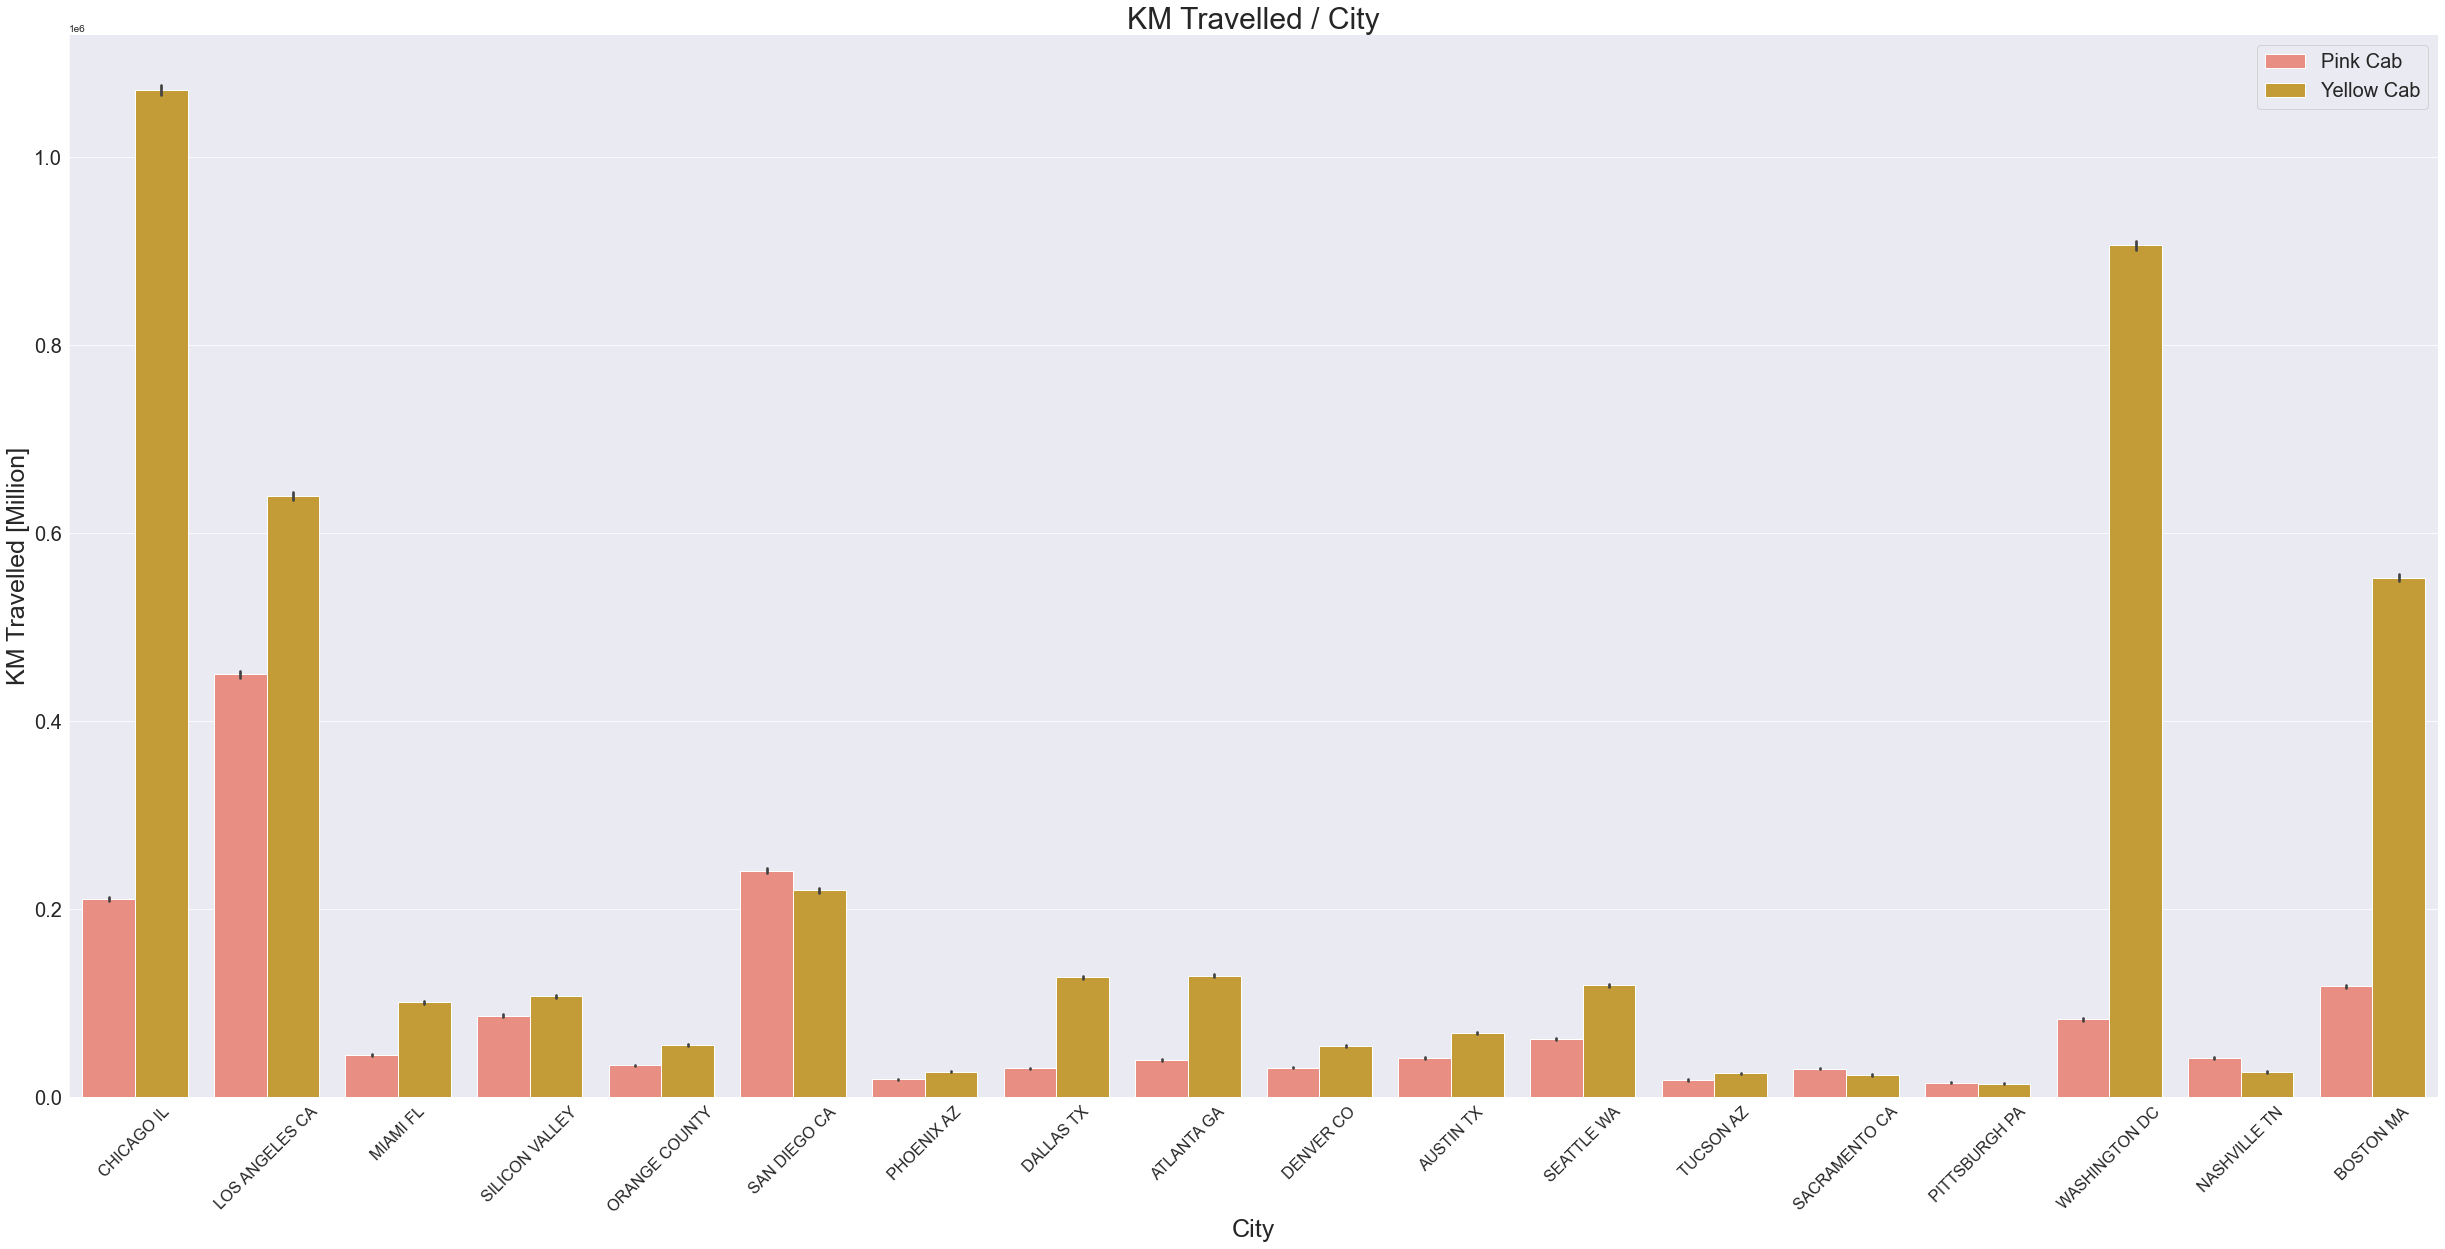

In [45]:
# Visualize again without New York

# KM Travelled per city -Except NewYork-
sns.catplot(data=df_city_cab_rest, x='City', y='KM Travelled', hue='Company', kind='bar', estimator=sum, legend_out=False, palette=sns.color_palette(['salmon', 'goldenrod']))
plt.gcf().set_size_inches(40, 17)
plt.title("KM Travelled / City", fontsize=30)
plt.xlabel('City', fontsize=25)
plt.ylabel('KM Travelled [Million]', fontsize=25)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=20);
plt.legend(prop={'size': 20});

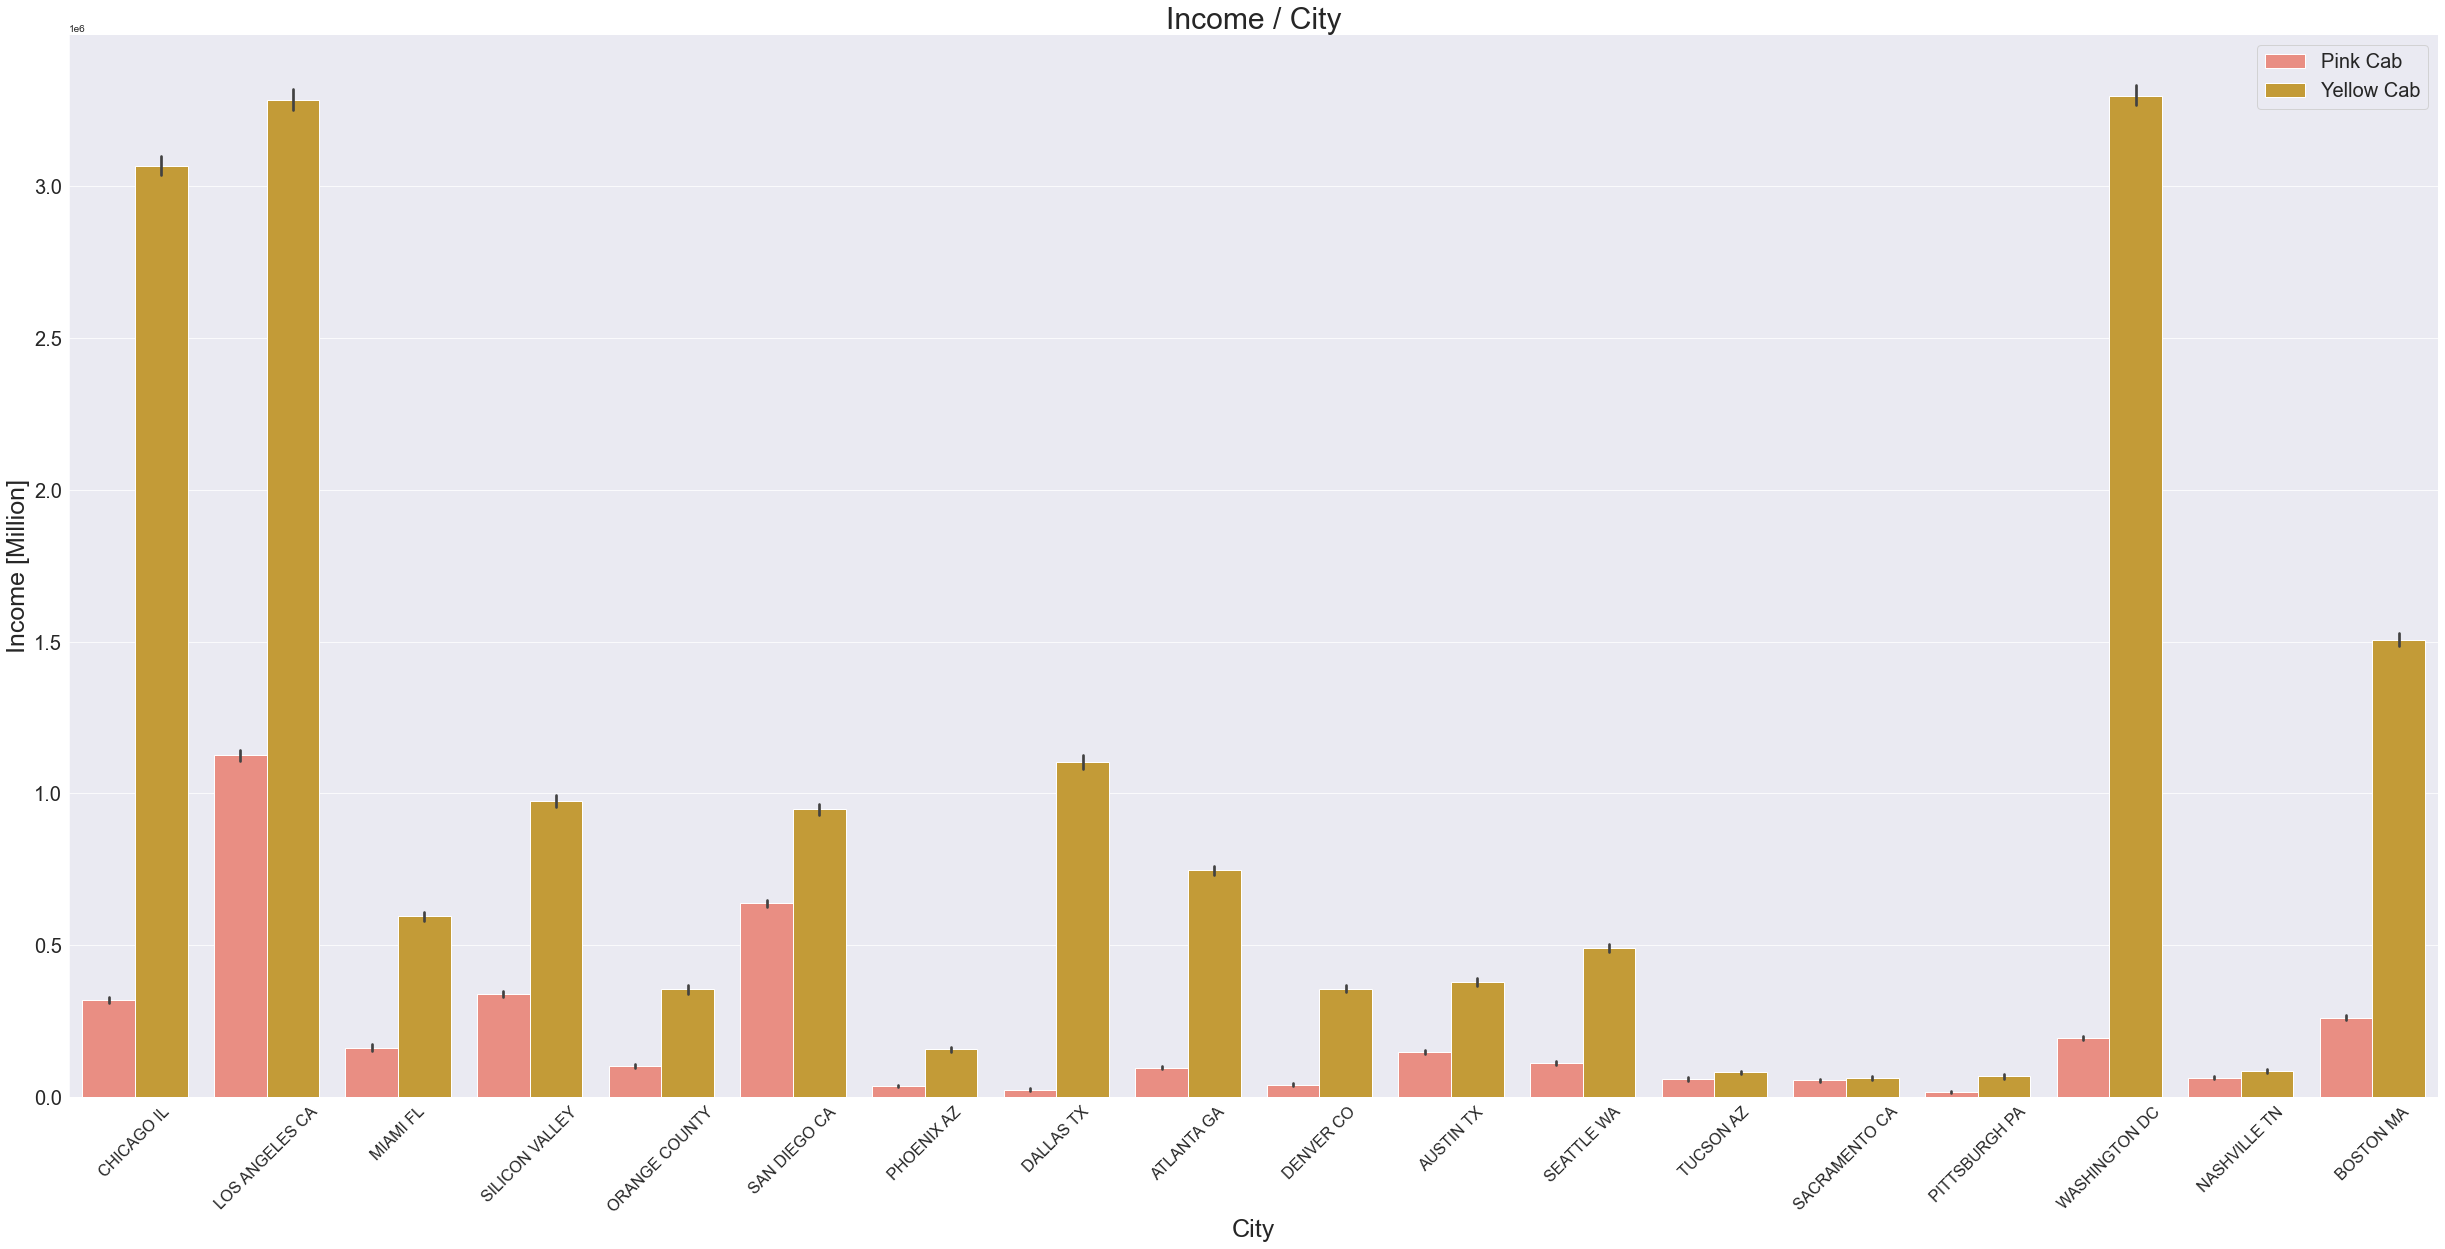

In [48]:
# Income per city -Except NewYork-
sns.catplot(data=df_city_cab_rest, x='City', y='Ride Income', hue='Company', kind='bar', estimator=sum, legend_out=False, palette=sns.color_palette(['salmon', 'goldenrod']))
plt.gcf().set_size_inches(40, 17)
plt.title("Income / City", fontsize=30)
plt.xlabel('City', fontsize=25)
plt.ylabel('Income [Million]', fontsize=25)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=20);
plt.legend(prop={'size': 20});

---
#### ans3: So it is obvious that in almost every city, Yellow cab is much more demanded and profitable

---
#### Before we continue, lets create the master data set
---

In [49]:
print(f'Cab Data: {df_cab.shape}')
print(f'City Data: {df_city.shape}')
print(f'Customer Data: {df_customer.shape}')
print(f'Transaction Data: {df_transaction.shape}')
print(f'Holiday Data: {df_holidays.shape}')

Cab Data: (359392, 8)
City Data: (20, 4)
Customer Data: (49171, 4)
Transaction Data: (440098, 3)
Holiday Data: (90, 2)


In [50]:
df_city_cab.head(1)

,City,Population,Users,Perc_Users,Transaction ID,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip,Ride Income
0,NEW YORK NY,8405837,302149,3.594514,10000139,2016-01-08,Pink Cab,17.85,242.9,198.135,44.765


In [51]:
df_customer.head(1)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813


In [52]:
df_transaction.head(1)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card


In [53]:
df_holidays.rename({'Date': 'Date of Travel'}, axis=1, inplace=True)
df_holidays['Date of Travel'] = df_holidays['Date of Travel'].astype('datetime64')
df_holidays.head(1)

,Date of Travel,Name
0,2012-01-02,New Year Day


In [54]:
# Lets merge
df_customer_transaction = pd.merge(df_customer, df_transaction, on='Customer ID', how='inner')
df_customer_transaction.head(2)

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode
0,29290,Male,28,10813,10000011,Card
1,29290,Male,28,10813,10351127,Cash


In [55]:
df_master = pd.merge(df_city_cab, df_customer_transaction, on='Transaction ID', how='inner')
df_master.head(2)

,City,Population,Users,Perc_Users,Transaction ID,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip,Ride Income,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,NEW YORK NY,8405837,302149,3.594514,10000139,2016-01-08,Pink Cab,17.85,242.90,198.135,44.765,2416,Male,28,21399,Cash
1,NEW YORK NY,8405837,302149,3.594514,10000140,2016-01-09,Pink Cab,25.30,407.21,255.530,151.680,2060,Male,18,8149,Card


---
#### Some investigation on the master dataset
---

#### Male/Female Customers

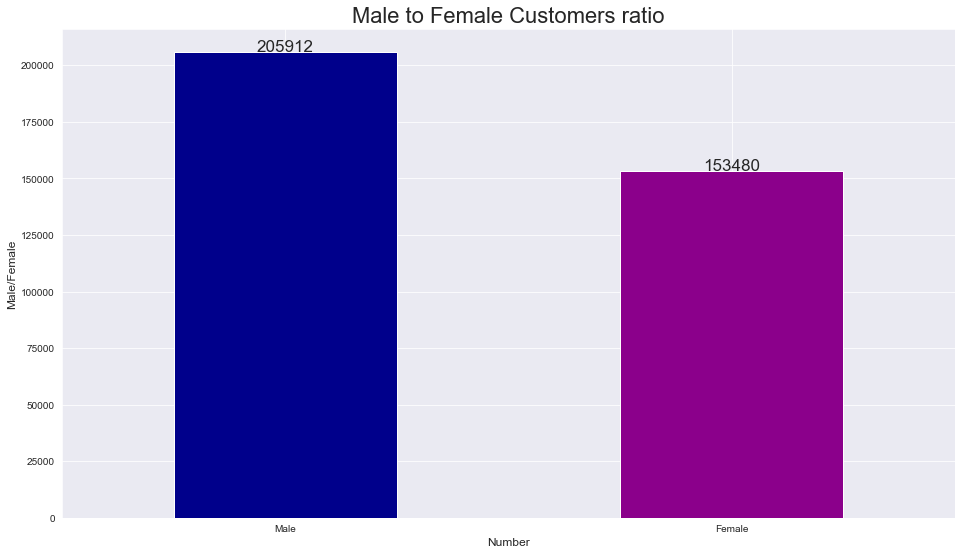

In [56]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center', fontsize=17)

plt.figure(figsize=(16, 9))
df_master['Gender'].value_counts().plot(kind='bar', color=['darkblue', 'darkmagenta']);
plt.title('Male to Female Customers ratio', fontsize=22)
plt.xlabel("Number", fontsize=12)
plt.ylabel("Male/Female", fontsize=12)
plt.xticks(rotation=0);
addlabels(df_master['Gender'].value_counts().index, df_master['Gender'].value_counts())

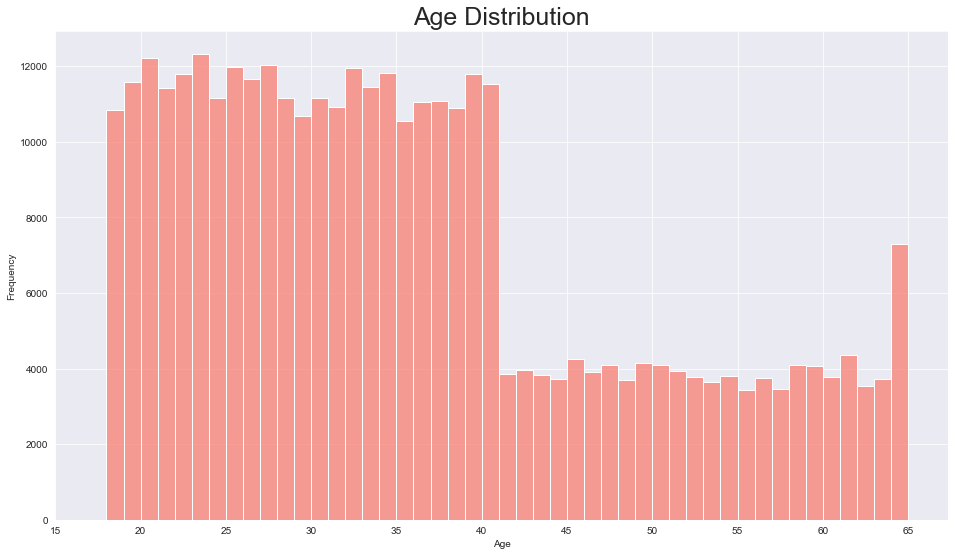

In [57]:
# Customer age distribution
plt.figure(figsize=(16,9))
sns.histplot(data=df_master, x='Age', bins=47, color='salmon')
plt.title('Age Distribution', fontsize=25)
plt.ylabel('Frequency')
plt.xlabel('Age');
plt.xticks(np.arange(15, 70, 5));

---
#### Most of the ages are between 16 and 40 
---

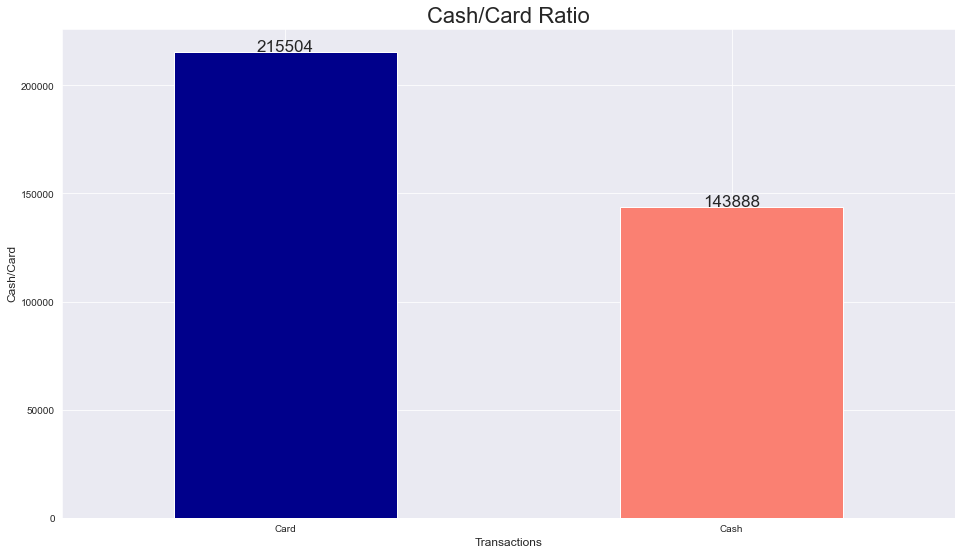

In [58]:
# Card vs Cash payment
plt.figure(figsize=(16, 9))
df_master['Payment_Mode'].value_counts().plot(kind='bar', color=['darkblue', 'salmon']);
plt.title('Cash/Card Ratio', fontsize=22)
plt.xlabel("Transactions", fontsize=12)
plt.ylabel("Cash/Card", fontsize=12)
plt.xticks(rotation=0);
addlabels(df_master['Payment_Mode'].value_counts().index, df_master['Payment_Mode'].value_counts())

---
#### q4: In holidays which company is the most demanded ?
---

In [59]:
df_master_holiday = pd.merge(df_master, df_holidays, on='Date of Travel', how='inner')
df_master_holiday.head(10)

,City,Population,Users,Perc_Users,Transaction ID,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip,Ride Income,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Name
0,NEW YORK NY,8405837,302149,3.594514,10001513,2016-01-18,Pink Cab,5.45,74.47,57.2250,17.2450,944,Male,24,13413,Card,Martin Luther King Jr. Day
1,NEW YORK NY,8405837,302149,3.594514,10001520,2016-01-18,Pink Cab,17.64,254.94,178.1640,76.7760,1888,Male,37,5600,Cash,Martin Luther King Jr. Day
2,NEW YORK NY,8405837,302149,3.594514,10002155,2016-01-18,Yellow Cab,7.77,187.41,97.9020,89.5080,21,Male,39,15375,Cash,Martin Luther King Jr. Day
3,NEW YORK NY,8405837,302149,3.594514,10002187,2016-01-18,Yellow Cab,13.52,357.31,186.5760,170.7340,2388,Male,56,17970,Card,Martin Luther King Jr. Day
4,NEW YORK NY,8405837,302149,3.594514,10002210,2016-01-18,Yellow Cab,34.56,931.11,485.2224,445.8876,1563,Male,24,10066,Card,Martin Luther King Jr. Day
5,NEW YORK NY,8405837,302149,3.594514,10002214,2016-01-18,Yellow Cab,21.42,599.08,257.0400,342.0400,328,Male,20,7999,Card,Martin Luther King Jr. Day
6,NEW YORK NY,8405837,302149,3.594514,10002234,2016-01-18,Yellow Cab,8.32,230.56,114.8160,115.7440,117,Male,61,19825,Cash,Martin Luther King Jr. Day
7,NEW YORK NY,8405837,302149,3.594514,10002256,2016-01-18,Yellow Cab,24.00,572.70,319.6800,253.0200,72,Male,41,16769,Card,Martin Luther King Jr. Day
8,NEW YORK NY,8405837,302149,3.594514,10002268,2016-01-18,Yellow Cab,43.29,1021.91,623.3760,398.5340,129,Male,21,7853,Cash,Martin Luther King Jr. Day
9,NEW YORK NY,8405837,302149,3.594514,10002275,2016-01-18,Yellow Cab,38.76,944.81,497.6784,447.1316,2894,Male,36,2530,Card,Martin Luther King Jr. Day


In [60]:
df_master_holiday.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7577 entries, 0 to 7576
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   City                7577 non-null   object        
 1   Population          7577 non-null   int64         
 2   Users               7577 non-null   int64         
 3   Perc_Users          7577 non-null   float64       
 4   Transaction ID      7577 non-null   int64         
 5   Date of Travel      7577 non-null   datetime64[ns]
 6   Company             7577 non-null   object        
 7   KM Travelled        7577 non-null   float64       
 8   Price Charged       7577 non-null   float64       
 9   Cost of Trip        7577 non-null   float64       
 10  Ride Income         7577 non-null   float64       
 11  Customer ID         7577 non-null   int64         
 12  Gender              7577 non-null   object        
 13  Age                 7577 non-null   int64       

In [61]:
df_master_holiday_grouped = df_master_holiday.groupby(['City', 'Company', 'Name']).sum().reset_index()
df_master_holiday_grouped

,City,Company,Name,Population,Users,Perc_Users,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Ride Income,Customer ID,Age,Income (USD/Month)
0,ATLANTA GA,Pink Cab,Christmas Day,6519080,197608,24.249802,81021105,90.78,1555.14,996.7820,558.3580,229282,301,113701
1,ATLANTA GA,Pink Cab,Columbus Day,2444655,74103,9.093676,30854256,69.35,911.65,732.8480,178.8020,83532,113,80065
2,ATLANTA GA,Pink Cab,Independence Day,4074425,123505,15.156126,50978704,110.89,1402.42,1182.0050,220.4150,144242,135,62813
3,ATLANTA GA,Pink Cab,Labor Day,3259540,98804,12.124901,40578060,103.07,1162.97,1179.2500,-16.2800,113447,193,76279
4,ATLANTA GA,Pink Cab,Martin Luther King Jr. Day,1629770,49402,6.062451,20137743,31.00,300.12,340.5560,-40.4360,58023,50,29934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,WASHINGTON DC,Yellow Cab,Memorial Day,19686373,5969047,1425.073115,480415275,1055.95,19548.11,13963.5456,5584.5644,2479862,1581,642307
351,WASHINGTON DC,Yellow Cab,New Year Day,26806976,8128064,1940.525093,653838844,1531.06,25813.76,20178.0336,5635.7264,3361636,2537,933255
352,WASHINGTON DC,Yellow Cab,Presidents Day (Washingtons Birthday),18848655,5715045,1364.431706,457355248,1256.70,21738.43,16451.1588,5287.2712,2363442,1587,700826
353,WASHINGTON DC,Yellow Cab,Thanksgiving Day,46493349,14097111,3365.598208,1139062537,2324.81,33556.44,30722.0820,2834.3580,5810883,3971,1466604


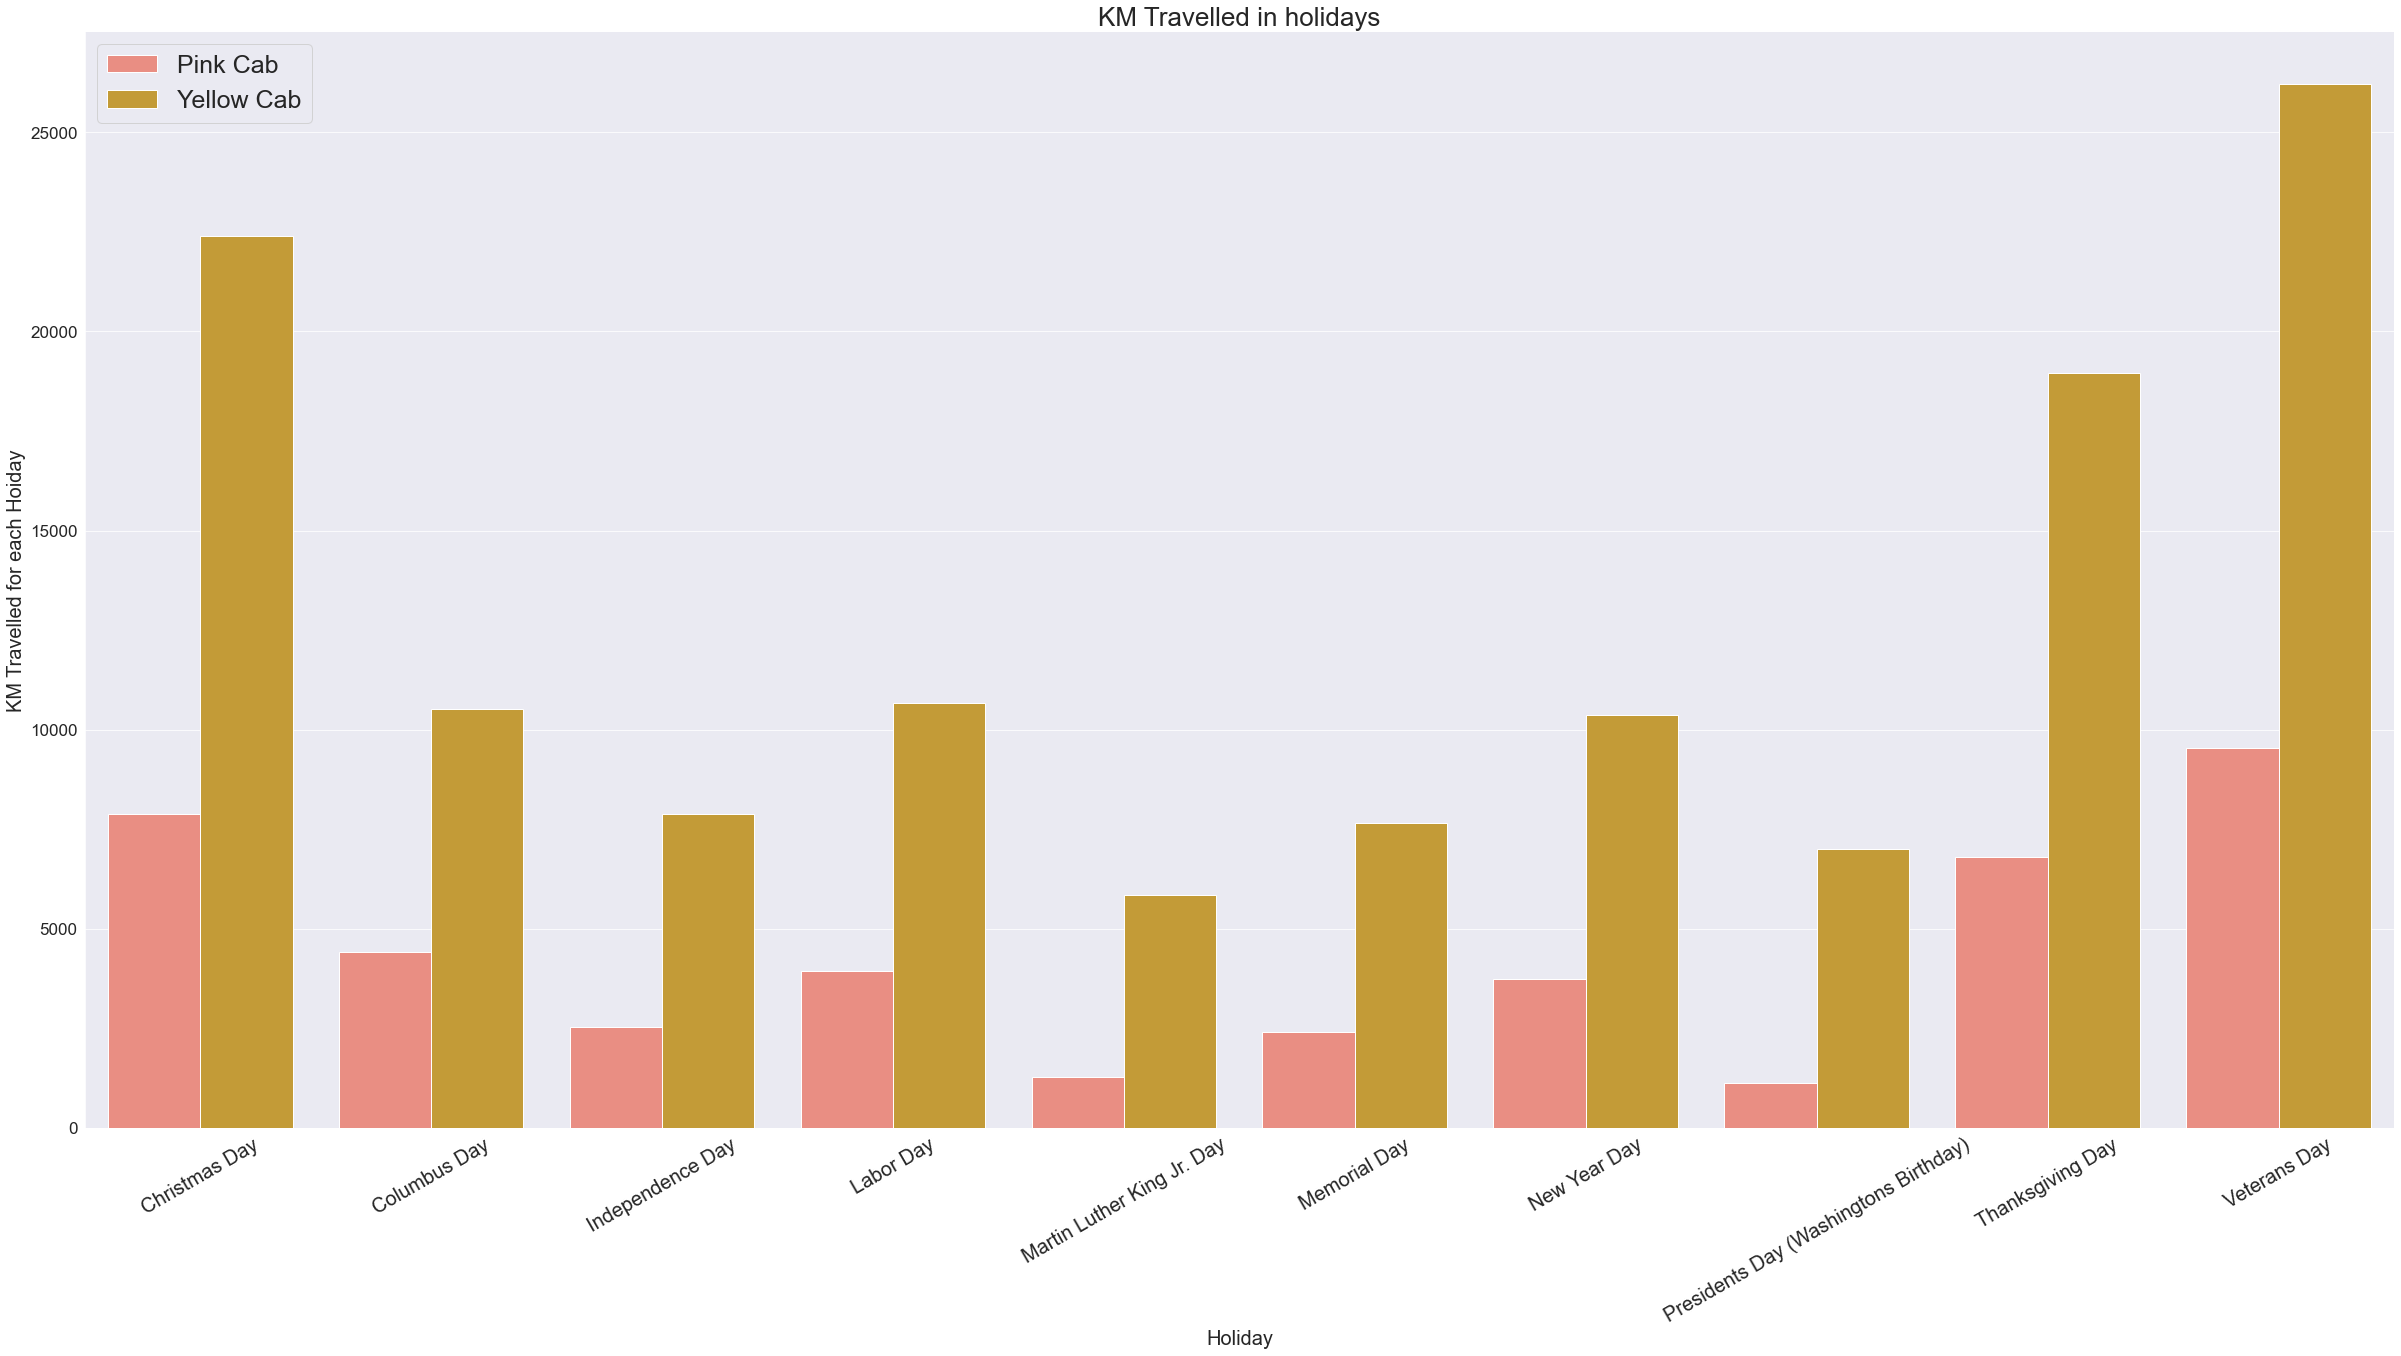

In [62]:
# Activity in hoidays
sns.catplot(data=df_master_holiday_grouped, x='Name', y='KM Travelled', hue='Company', kind='bar', estimator=sum, ci=None, legend_out=False, palette=sns.color_palette(['salmon', 'goldenrod']))
plt.gcf().set_size_inches(40, 17)
plt.title("KM Travelled in holidays", fontsize=26)
plt.xlabel('Holiday', fontsize=20)
plt.ylabel('KM Travelled for each Hoiday', fontsize=20)
plt.xticks(rotation = 30, fontsize=20)
plt.yticks(fontsize=17)
plt.legend(loc='upper left', fontsize=25);

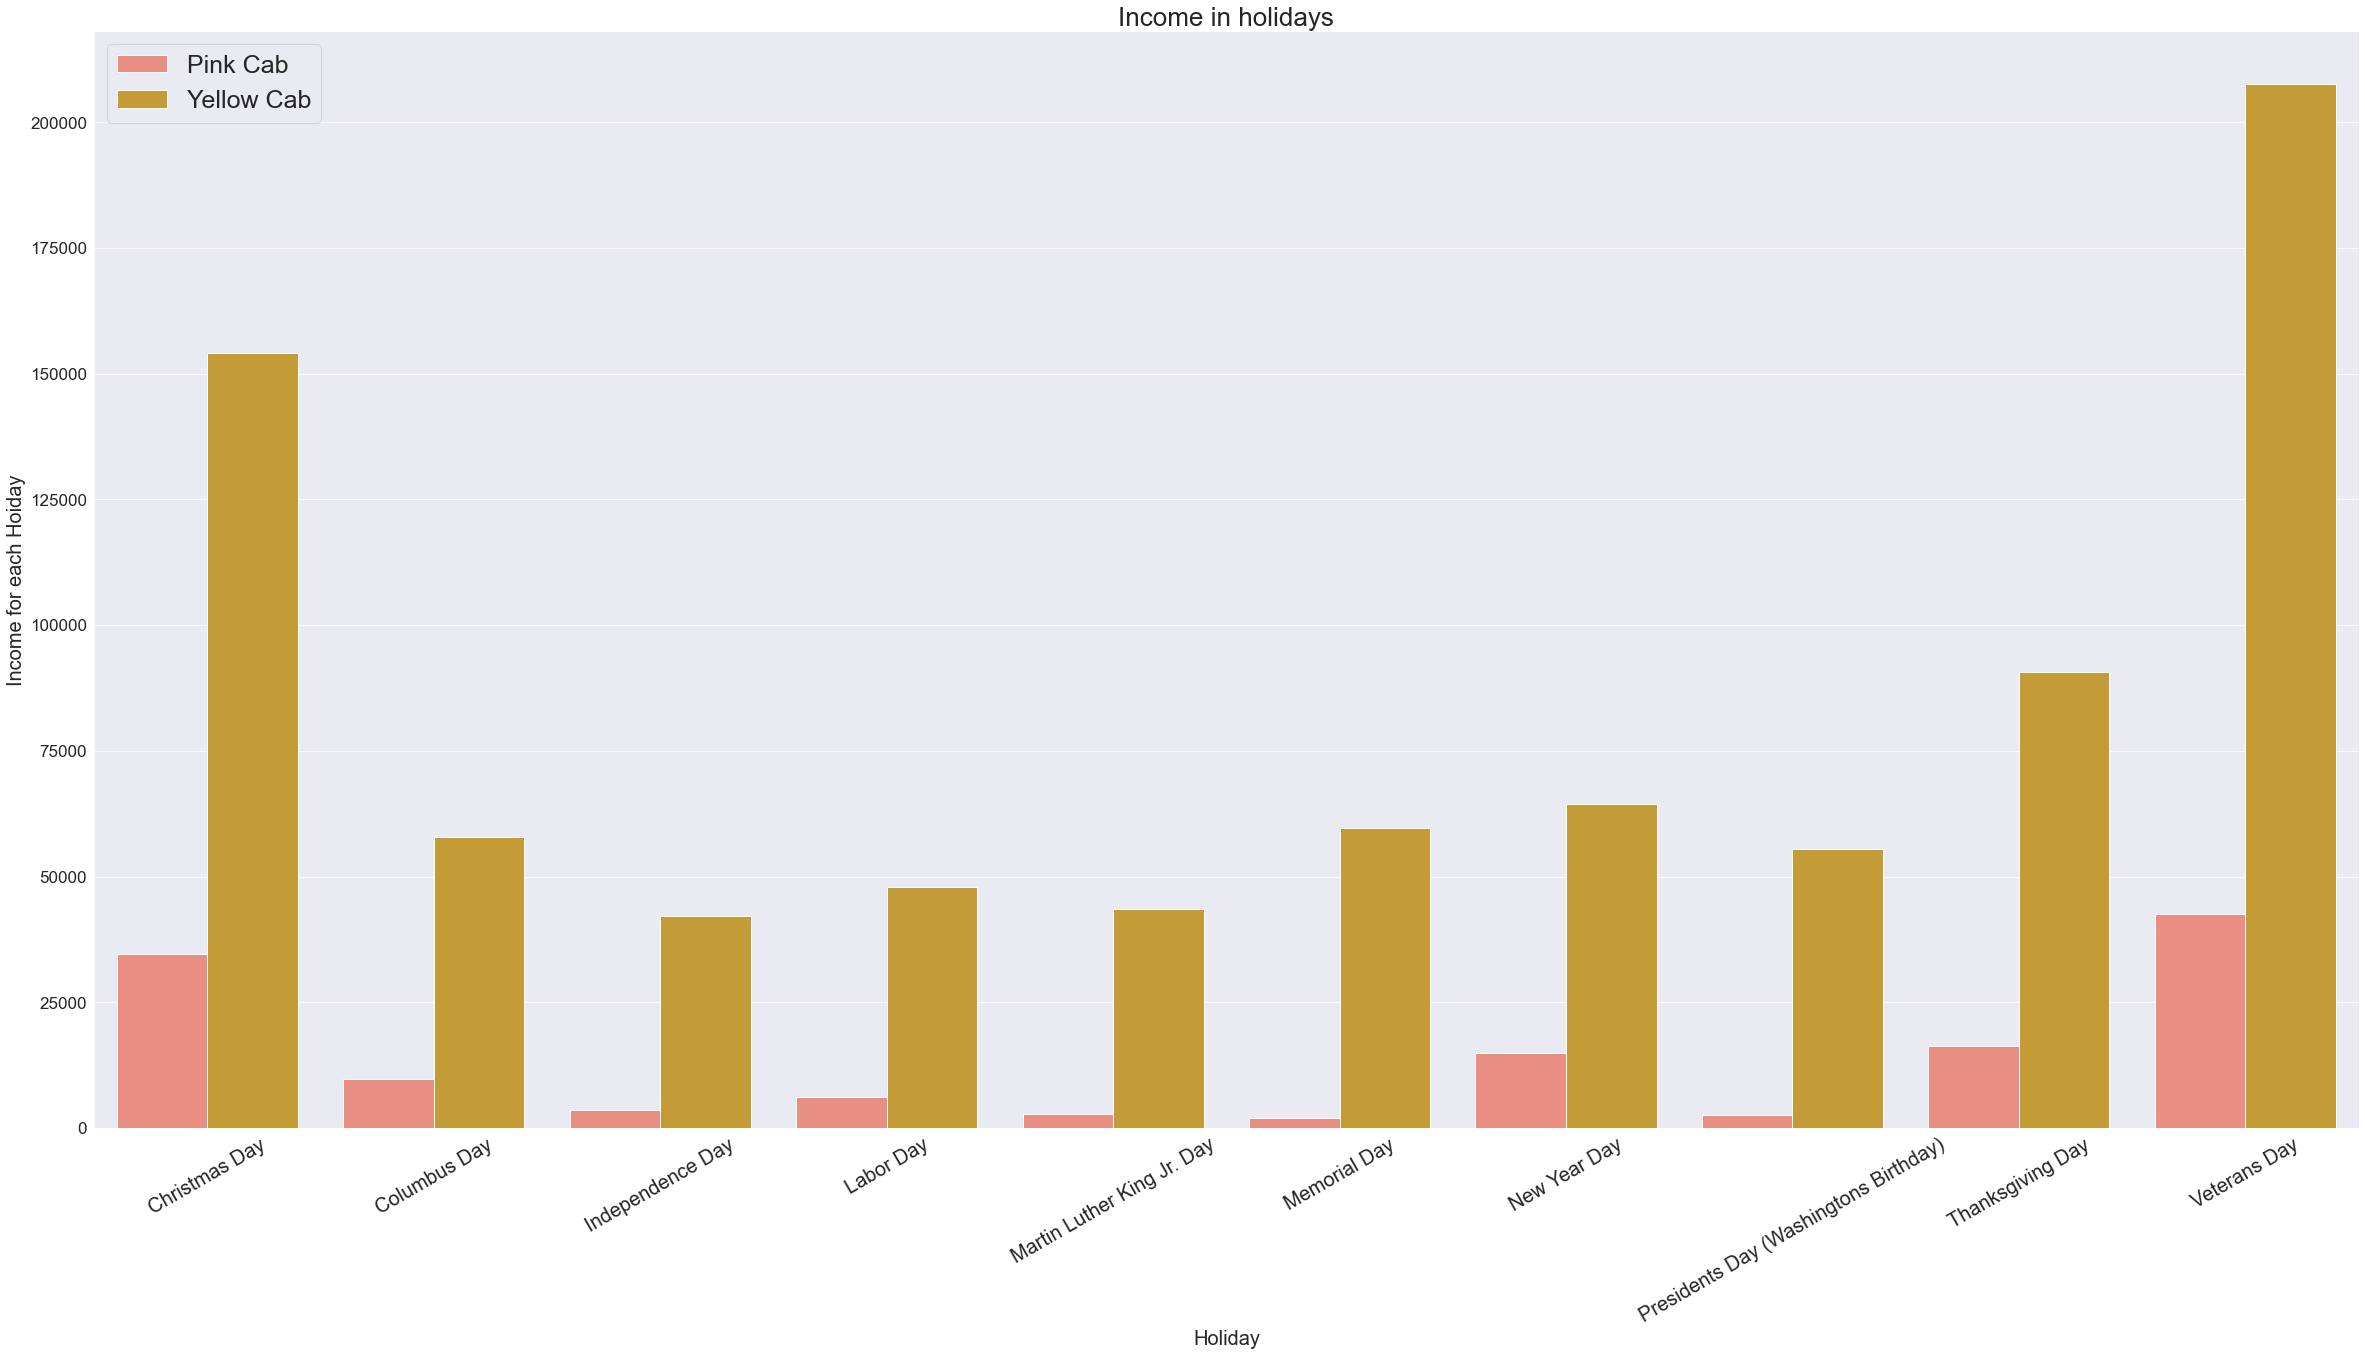

In [63]:
# Income in holidays
sns.catplot(data=df_master_holiday_grouped, x='Name', y='Ride Income', hue='Company', kind='bar', estimator=sum, ci=None, legend_out=False, palette=sns.color_palette(['salmon', 'goldenrod']))
plt.gcf().set_size_inches(40, 17)
plt.title("Income in holidays", fontsize=26)
plt.xlabel('Holiday', fontsize=20)
plt.ylabel('Income for each Hoiday', fontsize=20)
plt.xticks(rotation = 30, fontsize=20)
plt.yticks(fontsize=17)
plt.legend(loc='upper left', fontsize=25);

---
#### ans4: In every holiday, Yellow Cab is the most demanded and most Profitable
---

### Conclusion:
Based on the investigation above, it is safe to say the company should consider `Yellow Cab` for investment.